This notebook summarizes the results from the whole PXD001468 and PXD032235 dataset calibration performed in CalibrationVX_CS_FullDAtasets.ipynb. This file also contains (most of) the Figures used and discussed in the thesis.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

PXD001468 = "results/sage/FULL_PXD001468.tsv"
df_uncal_results = pd.read_csv(PXD001468, sep='\t')
print("Lineair data uncalibrated CS:                     ", df_uncal_results.shape)
df_uncal_results_q = df_uncal_results[df_uncal_results["spectrum_q"] < 0.01]
print("Lineair data uncalibrated CS q:                   ", df_uncal_results_q.shape)
df_uncal_results_qpep = df_uncal_results_q[df_uncal_results_q["peptide_q"] < 0.01]

PXD032235 = "results/sage/FULL_PXD032235.tsv"
df_uncal_results_nonlin = pd.read_csv(PXD032235, sep='\t')
print("NON-Lineair data uncalibrated CS:                     ", df_uncal_results_nonlin.shape)
df_uncal_results_nonlin_q = df_uncal_results_nonlin[df_uncal_results_nonlin["spectrum_q"] < 0.01]
print("NON-Lineair data uncalibrated CS q:                   ", df_uncal_results_nonlin_q.shape)
df_LRcal_results_qpep = df_uncal_results_q[df_uncal_results_q["peptide_q"] < 0.01]

PXD001468_LRcal = "results/sage/FULL_PXD001468_LRcal.tsv"
df_LRcal_results = pd.read_csv(PXD001468_LRcal, sep='\t')
print("Lineair data LR calibrated CS:                       ", df_LRcal_results.shape)
df_LRcal_results_q = df_LRcal_results[df_LRcal_results["spectrum_q"] < 0.01]
print("Lineair data LR calibrated CS q:                     ", df_LRcal_results_q.shape)
df_RFcal_results_qpep = df_uncal_results_q[df_uncal_results_q["peptide_q"] < 0.01]

PXD032235_LRcal = "results/sage/FULL_PXD032235_LRcal.tsv"
df_LRcal_results_nonlin = pd.read_csv(PXD032235_LRcal, sep='\t')
print("NON-Lineair data LR calibrated CS:                       ", df_LRcal_results_nonlin.shape)
df_LRcal_results_nonlin_q = df_LRcal_results_nonlin[df_LRcal_results_nonlin["spectrum_q"] < 0.01]
print("NON-Lineair data LR calibrated CS q:                     ", df_LRcal_results_nonlin_q.shape)
df_uncal_results_nonlin_qpep = df_uncal_results_nonlin_q[df_uncal_results_nonlin_q["peptide_q"] < 0.01]

PXD001468_RFcal = "results/sage/FULL_PXD001468_RFcal.tsv"
df_RFcal_results = pd.read_csv(PXD001468_RFcal, sep='\t')
print("Lineair data RF calibrated CS:                       ", df_RFcal_results.shape)
df_RFcal_results_q = df_RFcal_results[df_RFcal_results["spectrum_q"] < 0.01]
print("Lineair data RF calibrated CS q:                     ", df_RFcal_results_q.shape)
df_LRcal_results_nonlin_qpep = df_LRcal_results_nonlin_q[df_LRcal_results_nonlin_q["peptide_q"] < 0.01]

PXD032235_RFcal = "results/sage/FULL_PXD032235_RFcal.tsv"
df_RFcal_results_nonlin = pd.read_csv(PXD032235_RFcal, sep='\t')
print("NON-Lineair data RF calibrated CS:                       ", df_RFcal_results_nonlin.shape)
df_RFcal_results_nonlin_q = df_RFcal_results_nonlin[df_RFcal_results_nonlin["spectrum_q"] < 0.01]
print("NON-Lineair data RF calibrated CS q:                     ", df_RFcal_results_nonlin_q.shape)
df_RFcal_results_nonlin_qpep = df_RFcal_results_nonlin_q[df_RFcal_results_nonlin_q["peptide_q"] < 0.01]

Lineair data uncalibrated CS:                      (779484, 36)
Lineair data uncalibrated CS q:                    (418179, 36)
NON-Lineair data uncalibrated CS:                      (646189, 36)
NON-Lineair data uncalibrated CS q:                    (535853, 36)
Lineair data LR calibrated CS:                        (775141, 36)
Lineair data LR calibrated CS q:                      (419191, 36)
NON-Lineair data LR calibrated CS:                        (583397, 36)
NON-Lineair data LR calibrated CS q:                      (512052, 36)
Lineair data RF calibrated CS:                        (778073, 36)
Lineair data RF calibrated CS q:                      (419522, 36)
NON-Lineair data RF calibrated CS:                        (607608, 36)
NON-Lineair data RF calibrated CS q:                      (514288, 36)


In [1]:
'''
import pickle

with open("spectra_by_file.pkl", "rb") as f:
    spectra_by_file = pickle.load(f)
    
with open("spectra_by_file_nonlin.pkl", "rb") as f:
    spectra_by_file_nonlin = pickle.load(f)
    
with open("spectra_by_file_LR.pkl", "rb") as f:
    spectra_by_file_LR = pickle.load(f) 
    
with open("spectra_by_file_LR_nonlin.pkl", "rb") as f:
    spectra_by_file_LR_nonlin = pickle.load(f)
    
with open("spectra_by_file_RF.pkl", "rb") as f:
    spectra_by_file_RF = pickle.load(f) 
    
with open("spectra_by_file_RF_nonlin.pkl", "rb") as f:
    spectra_by_file_RF_nonlin = pickle.load(f)
'''

In [2]:
'''
from pyteomics import mass

modification_dict = {
    '[+15.9949]': 'ox',
    '[+57.0214]': 'cm'
}
print(modification_dict)

db = mass.Unimod()
aa_comp = dict(mass.std_aa_comp)
aa_comp['ox'] = db.by_title('Oxidation')['composition']
aa_comp['cm'] = db.by_title('Carbamidomethyl')['composition']
print(aa_comp)
'''

{'[+15.9949]': 'ox', '[+57.0214]': 'cm'}
{'A': Composition({'H': 5, 'C': 3, 'O': 1, 'N': 1}), 'C': Composition({'H': 5, 'C': 3, 'S': 1, 'O': 1, 'N': 1}), 'D': Composition({'H': 5, 'C': 4, 'O': 3, 'N': 1}), 'E': Composition({'H': 7, 'C': 5, 'O': 3, 'N': 1}), 'F': Composition({'H': 9, 'C': 9, 'O': 1, 'N': 1}), 'G': Composition({'H': 3, 'C': 2, 'O': 1, 'N': 1}), 'H': Composition({'H': 7, 'C': 6, 'N': 3, 'O': 1}), 'I': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'J': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'K': Composition({'H': 12, 'C': 6, 'N': 2, 'O': 1}), 'L': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'M': Composition({'H': 9, 'C': 5, 'S': 1, 'O': 1, 'N': 1}), 'N': Composition({'H': 6, 'C': 4, 'O': 2, 'N': 2}), 'P': Composition({'H': 7, 'C': 5, 'O': 1, 'N': 1}), 'Q': Composition({'H': 8, 'C': 5, 'O': 2, 'N': 2}), 'R': Composition({'H': 12, 'C': 6, 'N': 4, 'O': 1}), 'S': Composition({'H': 5, 'C': 3, 'O': 2, 'N': 1}), 'T': Composition({'H': 7, 'C': 4, 'O': 2, 'N': 1}), '

In [8]:
'''
def extract_features(row, spectra_dict):
    file = row['filename']
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    spectrum = spectra_dict[file][index_in_mzml]
    
    # Check if 'precursorList' is present in the spectrum dictionary
    if 'precursorList' in spectrum:
        charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    else:
        charge = 0
        
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
        
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT
'''

In [10]:
'''
df_uncal_results_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_q.apply(lambda row: extract_features(row, spectra_by_file), axis=1, result_type='expand')
df_uncal_results_q.to_csv('df_uncal_results_q.csv', index=False)
print('df_uncal_results_q done!')

df_uncal_results_nonlin_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_nonlin_q.apply(lambda row: extract_features(row, spectra_by_file_nonlin), axis=1, result_type='expand')
df_uncal_results_nonlin_q.to_csv('df_uncal_results_nonlin_q.csv', index=False)
print('df_uncal_results_nonlin_q done!')

df_LRcal_results_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_LRcal_results_q.apply(lambda row: extract_features(row, spectra_by_file_LR), axis=1, result_type='expand')
df_LRcal_results_q.to_csv('df_LRcal_results_q.csv', index=False)
print('df_LRcal_results_q done!')

df_LRcal_results_nonlin_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_LRcal_results_nonlin_q.apply(lambda row: extract_features(row, spectra_by_file_LR_nonlin), axis=1, result_type='expand')
df_LRcal_results_nonlin_q.to_csv('df_LRcal_results_nonlin_q.csv', index=False)
print('df_LRcal_results_nonlin_q done!')

df_RFcal_results_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_RFcal_results_q.apply(lambda row: extract_features(row, spectra_by_file_RF), axis=1, result_type='expand')
df_RFcal_results_q.to_csv('df_RFcal_results_q.csv', index=False)
print('df_RFcal_results_q done!')

df_RFcal_results_nonlin_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_RFcal_results_nonlin_q.apply(lambda row: extract_features(row, spectra_by_file_RF_nonlin), axis=1, result_type='expand')
df_RFcal_results_nonlin_q.to_csv('df_RFcal_results_nonlin_q.csv', index=False)
print('df_RFcal_results_nonlin_q done!')
'''

"\ndf_uncal_results_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_q.apply(lambda row: extract_features(row, spectra_by_file), axis=1, result_type='expand')\ndf_uncal_results_q.to_csv('df_uncal_results_q.csv', index=False)\nprint('df_uncal_results_q done!')\n\ndf_uncal_results_nonlin_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_nonlin_q.apply(lambda row: extract_features(row, spectra_by_file_nonlin), axis=1, result_type='expand')\ndf_uncal_results_nonlin_q.to_csv('df_uncal_results_nonlin_q.csv', index=False)\nprint('df_uncal_results_nonlin_q done!')\n\ndf_LRcal_results_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_LRcal_results_q.apply(lambda row: extract_features(row, spectra_by_file_LR), axis=1, result_type='expand')\ndf_LRcal_results_q.to_csv('df_LRcal_results_q.csv', index=False)\nprint('df_LRcal_results_q done!')\n\ndf_LRcal_results_nonlin_q[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_LRcal_results_nonlin_

In [3]:
import pandas as pd

# Load the dataframes from CSV files
df_uncal_results_q = pd.read_csv('df_uncal_results_q.csv')
df_uncal_results_nonlin_q = pd.read_csv('df_uncal_results_nonlin_q.csv')
df_LRcal_results_q = pd.read_csv('df_LRcal_results_q.csv')
df_LRcal_results_nonlin_q = pd.read_csv('df_LRcal_results_nonlin_q.csv')
df_RFcal_results_q = pd.read_csv('df_RFcal_results_q.csv')
df_RFcal_results_nonlin_q = pd.read_csv('df_RFcal_results_nonlin_q.csv')

In [4]:
dataframes = [df_uncal_results_q, df_uncal_results_nonlin_q, df_LRcal_results_q, df_LRcal_results_nonlin_q, df_RFcal_results_q, df_RFcal_results_nonlin_q]
for df in dataframes:
    df['deltamass'] = df['expmass'] - df['calcmass']

[-0.00460653  0.00669292]
[-0.00533289  0.00562409]
[-0.00228769  0.00217442]
[-0.00489864  0.01090434]
[-0.00562506  0.00825164]
[-0.00199327  0.00193531]


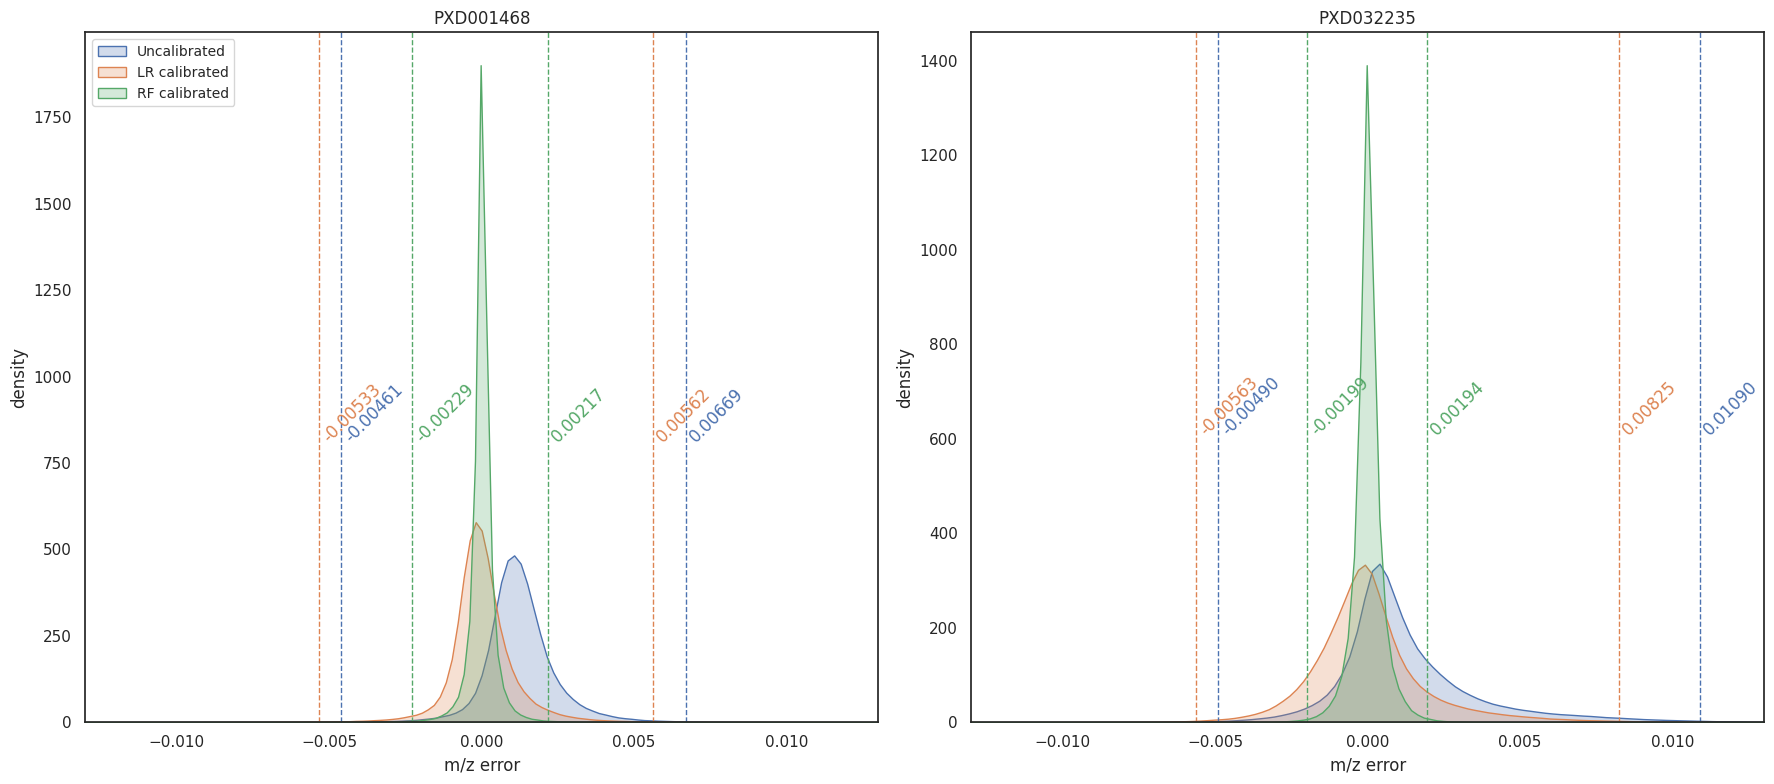

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles

# Set style to white
sns.set(style="white")

# Create a figure and two sets of axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Define columns to plot for both sets of dataframes
columns_to_plot = ['deltaMZ', 'deltaMZ', 'deltaMZ']
dataframes1 = [df_uncal_results_q, df_LRcal_results_q, df_RFcal_results_q]
dataframes2 = [df_uncal_results_nonlin_q, df_LRcal_results_nonlin_q, df_RFcal_results_nonlin_q]
labels = ['Uncalibrated', 'LR calibrated', 'RF calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# Initialize lists to store interval values for both sets of dataframes
interval_values1 = []
interval_values2 = []

# Loop through each dataframe and column, and create overlapping KDE plots for the first set
for df, column, label, color in zip(dataframes1, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax1)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values1.append((quantiles[0], quantiles[1]))
    
    # Draw interval lines
    ax1.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax1.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)
    
    # Annotate interval values
    ax1.text(quantiles[0], 800, f'{quantiles[0]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color=color)
    ax1.text(quantiles[1], 800, f'{quantiles[1]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color=color)

    print(quantiles)

# Loop through each dataframe and column, and create overlapping KDE plots for the second set
for df, column, label, color in zip(dataframes2, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax2)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values2.append((quantiles[0], quantiles[1]))
    
    # Draw interval lines
    ax2.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax2.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)
    
    # Annotate interval values
    ax2.text(quantiles[0], 600, f'{quantiles[0]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color=color)
    ax2.text(quantiles[1], 600, f'{quantiles[1]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color=color)

    print(quantiles)
    
# Set title and labels for the first subplot
ax1.set_title('PXD001468')
ax1.set_xlabel('m/z error')
ax1.set_ylabel('density')

# Set title and labels for the second subplot
ax2.set_title('PXD032235')
ax2.set_xlabel('m/z error')
ax2.set_ylabel('density')

# Move the legend for the first subplot to the top left and adjust font size
ax1.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='small')

# Set the x-axis limits for both subplots
ax1.set_xlim(-0.013, 0.013)
ax2.set_xlim(-0.013, 0.013)

# Show plot
plt.tight_layout()
plt.show()

In [3]:
df_uncal_results_q_99 = df_uncal_results_q[(df_uncal_results_q['deltaMZ'] > interval_values1[0][0]) & (df_uncal_results_q['deltaMZ'] < interval_values1[0][1])]
df_uncal_results_nonlin_q_99 = df_uncal_results_nonlin_q[(df_uncal_results_nonlin_q['deltaMZ'] > interval_values2[0][0]) & (df_uncal_results_nonlin_q['deltaMZ'] < interval_values2[0][1])]
df_LRcal_results_q_99 = df_LRcal_results_q[(df_LRcal_results_q['deltaMZ'] > interval_values1[1][0]) & (df_LRcal_results_q['deltaMZ'] < interval_values1[1][1])]
df_LRcal_results_nonlin_q_99 = df_LRcal_results_nonlin_q[(df_LRcal_results_nonlin_q['deltaMZ'] > interval_values2[1][0]) & (df_LRcal_results_nonlin_q['deltaMZ'] < interval_values2[1][1])]
df_RFcal_results_q_99 = df_RFcal_results_q[(df_RFcal_results_q['deltaMZ'] > interval_values1[2][0]) & (df_RFcal_results_q['deltaMZ'] < interval_values1[2][1])]
df_RFcal_results_nonlin_q_99 = df_RFcal_results_nonlin_q[(df_RFcal_results_nonlin_q['deltaMZ'] > interval_values2[2][0]) & (df_RFcal_results_nonlin_q['deltaMZ'] < interval_values2[2][1])]

NameError: name 'interval_values1' is not defined

In [19]:
df_uncal_results_q_99['deltaMZ'].describe()

count    413997.000000
mean          0.001253
std           0.001145
min          -0.004604
25%           0.000640
50%           0.001167
75%           0.001781
max           0.006692
Name: deltaMZ, dtype: float64

In [20]:
df_LRcal_results_q_99['deltaMZ'].describe()

count    414999.000000
mean          0.000020
std           0.001058
min          -0.005332
25%          -0.000509
50%          -0.000064
75%           0.000461
max           0.005624
Name: deltaMZ, dtype: float64

In [21]:
df_RFcal_results_q_99['deltaMZ'].describe()

count    415326.000000
mean          0.000007
std           0.000391
min          -0.002288
25%          -0.000136
50%           0.000005
75%           0.000154
max           0.002174
Name: deltaMZ, dtype: float64

In [35]:
from scipy.stats import mannwhitneyu
import numpy as np

# Uncalibrated and LR Calibrated
statistic_lr, p_value_lr = mannwhitneyu(np.array(df_uncal_results_q_99['deltaMZ']), np.array(df_LRcal_results_q_99['deltaMZ']))
print("Uncalibrated vs. LR Calibrated:")
print("Test statistic:", statistic_lr)
print("p-value: {:.15f}".format(p_value_lr))  # Print p-value with more digits after the comma

# Uncalibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_uncal_results_q_99['deltaMZ'], df_RFcal_results_q_99['deltaMZ'])
print("\nUncalibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

# LR calibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_LRcal_results_q_99['deltaMZ'], df_RFcal_results_q_99['deltaMZ'])
print("\nLR calibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

Uncalibrated vs. LR Calibrated:
Test statistic: 142539867991.0
p-value: 0.000000000000000

Uncalibrated vs. RF Calibrated:
Test statistic: 154411695228.0
p-value: 0.000000000000000

LR calibrated vs. RF Calibrated:
Test statistic: 80870016572.5
p-value: 0.000000000000000


In [36]:
from scipy.stats import mannwhitneyu
import numpy as np

# Uncalibrated and LR Calibrated
statistic_lr, p_value_lr = mannwhitneyu(np.array(df_uncal_results_nonlin_q_99['deltaMZ']), np.array(df_LRcal_results_nonlin_q_99['deltaMZ']))
print("Uncalibrated vs. LR Calibrated:")
print("Test statistic:", statistic_lr)
print("p-value: {:.15f}".format(p_value_lr))  # Print p-value with more digits after the comma

# Uncalibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_uncal_results_nonlin_q_99['deltaMZ'], df_RFcal_results_nonlin_q_99['deltaMZ'])
print("\nUncalibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

# LR calibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_LRcal_results_nonlin_q_99['deltaMZ'], df_RFcal_results_nonlin_q_99['deltaMZ'])
print("\nLR calibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

Uncalibrated vs. LR Calibrated:
Test statistic: 184720758350.5
p-value: 0.000000000000000

Uncalibrated vs. RF Calibrated:
Test statistic: 196614278460.5
p-value: 0.000000000000000

LR calibrated vs. RF Calibrated:
Test statistic: 118003387707.0
p-value: 0.000000000000000


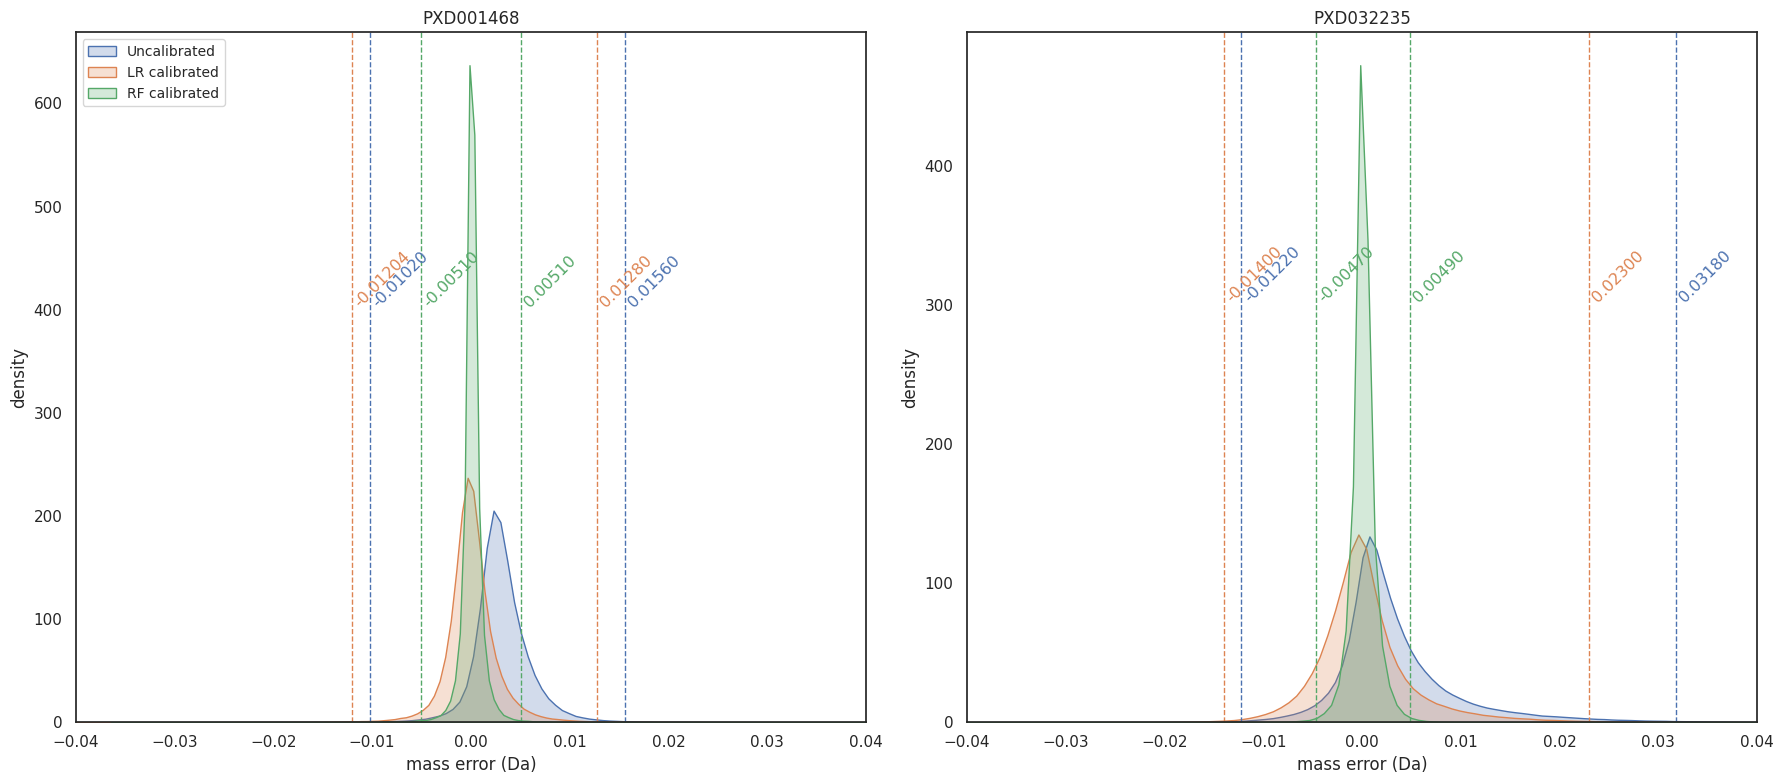

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles

# Set style to white
sns.set(style="white")

# Create a figure and two sets of axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Define columns to plot for both sets of dataframes
columns_to_plot = ['deltamass', 'deltamass', 'deltamass']
dataframes1 = [df_uncal_results_q, df_LRcal_results_q, df_RFcal_results_q]
dataframes2 = [df_uncal_results_nonlin_q, df_LRcal_results_nonlin_q, df_RFcal_results_nonlin_q]
labels = ['Uncalibrated', 'LR calibrated', 'RF calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# Initialize lists to store interval values for both sets of dataframes
interval_values1 = []
interval_values2 = []

# Loop through each dataframe and column, and create overlapping KDE plots for the first set
for df, column, label, color in zip(dataframes1, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax1)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values1.append((quantiles[0], quantiles[1]))
    
    # Draw interval lines
    ax1.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax1.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)
    
    # Annotate interval values
    ax1.text(quantiles[0], 400, f'{quantiles[0]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=11.5, color=color)
    ax1.text(quantiles[1], 400, f'{quantiles[1]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=11.5, color=color)

# Loop through each dataframe and column, and create overlapping KDE plots for the second set
for df, column, label, color in zip(dataframes2, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax2)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values2.append((quantiles[0], quantiles[1]))
    
    # Draw interval lines
    ax2.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax2.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)
    
    # Annotate interval values
    ax2.text(quantiles[0], 300, f'{quantiles[0]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=11.5, color=color)
    ax2.text(quantiles[1], 300, f'{quantiles[1]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=11.5, color=color)

# Set title and labels for the first subplot
ax1.set_title('PXD001468')
ax1.set_xlabel('mass error (Da)')
ax1.set_ylabel('density')

# Set title and labels for the second subplot
ax2.set_title('PXD032235')
ax2.set_xlabel('mass error (Da)')
ax2.set_ylabel('density')

# Move the legend for the first subplot to the top left and adjust font size
ax1.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='small')

# Set the x-axis limits for both subplots
ax1.set_xlim(-0.04, 0.04)
ax2.set_xlim(-0.04, 0.04)

# Show plot
plt.tight_layout()
plt.show()

In [6]:
df_uncal_results_q_99 = df_uncal_results_q[(df_uncal_results_q['deltamass'] > interval_values1[0][0]) & (df_uncal_results_q['deltamass'] < interval_values1[0][1])]
df_uncal_results_nonlin_q_99 = df_uncal_results_nonlin_q[(df_uncal_results_nonlin_q['deltamass'] > interval_values2[0][0]) & (df_uncal_results_nonlin_q['deltamass'] < interval_values2[0][1])]
df_LRcal_results_q_99 = df_LRcal_results_q[(df_LRcal_results_q['deltamass'] > interval_values1[1][0]) & (df_LRcal_results_q['deltamass'] < interval_values1[1][1])]
df_LRcal_results_nonlin_q_99 = df_LRcal_results_nonlin_q[(df_LRcal_results_nonlin_q['deltamass'] > interval_values2[1][0]) & (df_LRcal_results_nonlin_q['deltamass'] < interval_values2[1][1])]
df_RFcal_results_q_99 = df_RFcal_results_q[(df_RFcal_results_q['deltamass'] > interval_values1[2][0]) & (df_RFcal_results_q['deltamass'] < interval_values1[2][1])]
df_RFcal_results_nonlin_q_99 = df_RFcal_results_nonlin_q[(df_RFcal_results_nonlin_q['deltamass'] > interval_values2[2][0]) & (df_RFcal_results_nonlin_q['deltamass'] < interval_values2[2][1])]

In [7]:
from scipy.stats import mannwhitneyu
import numpy as np

# Uncalibrated and LR Calibrated
statistic_lr, p_value_lr = mannwhitneyu(np.array(df_uncal_results_q_99['deltamass']), np.array(df_LRcal_results_q_99['deltamass']))
print("Uncalibrated vs. LR Calibrated:")
print("Test statistic:", statistic_lr)
print("p-value: {:.15f}".format(p_value_lr))  # Print p-value with more digits after the comma

# Uncalibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_uncal_results_q_99['deltamass'], df_RFcal_results_q_99['deltamass'])
print("\nUncalibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

# LR calibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_LRcal_results_q_99['deltamass'], df_RFcal_results_q_99['deltamass'])
print("\nLR calibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

Uncalibrated vs. LR Calibrated:
Test statistic: 143356880468.0
p-value: 0.000000000000000

Uncalibrated vs. RF Calibrated:
Test statistic: 154432842315.5
p-value: 0.000000000000000

LR calibrated vs. RF Calibrated:
Test statistic: 80342866543.5
p-value: 0.000000000000000


/tmp/ipykernel_1349164/2399775737.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[0, 0], label=name, shade=True, color=color)
/tmp/ipykernel_1349164/2399775737.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[0, 0], label=name, shade=True, color=color)
/tmp/ipykernel_1349164/2399775737.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[0, 0], label=name, shade=True, color=color)
/tmp/ipykernel_1349164/2399775737.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; plea

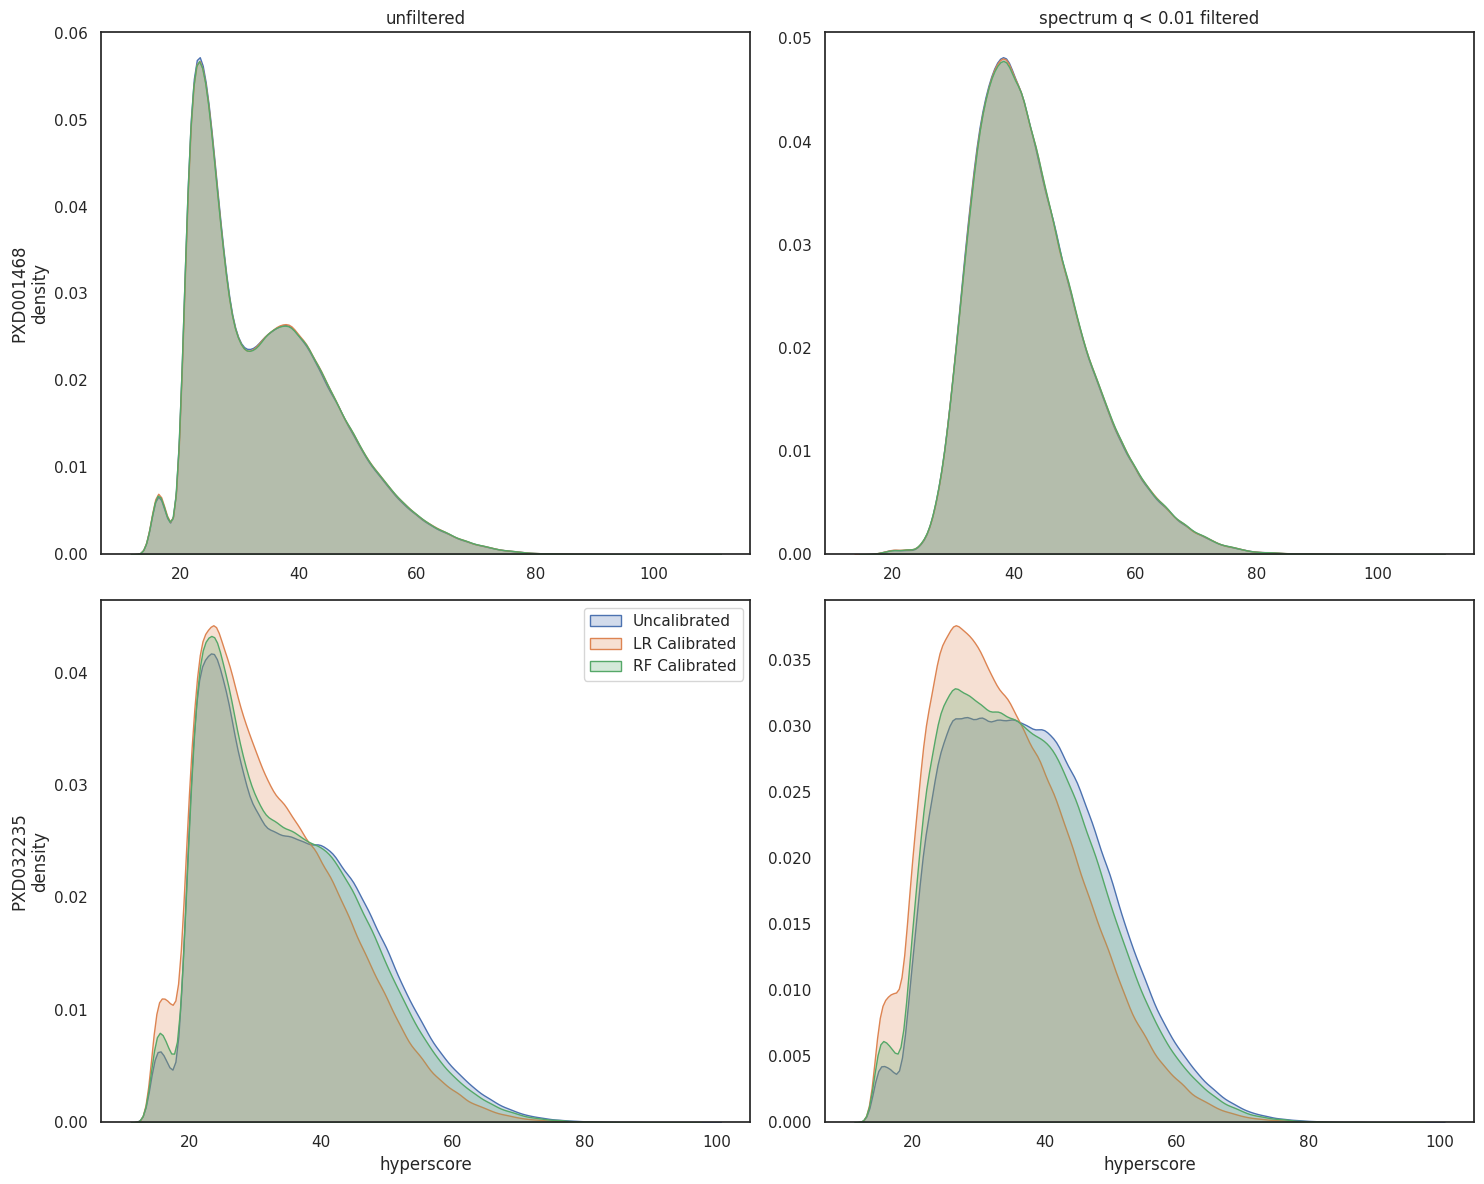

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of dataframes, columns, names, and colors for the first row
dataframes_lin = [df_uncal_results, df_LRcal_results, df_RFcal_results]
dataframes_nonlin = [df_uncal_results_nonlin, df_LRcal_results_nonlin, df_RFcal_results_nonlin]
columns_to_plot = ['hyperscore', 'hyperscore', 'hyperscore']
names = ['Uncalibrated', 'LR Calibrated', 'RF Calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# Define the list of dataframes, columns, names, and colors for the second row
dataframes_lin_q = [df_uncal_results_q, df_LRcal_results_q, df_RFcal_results_q]
dataframes_nonlin_q = [df_uncal_results_nonlin_q, df_LRcal_results_nonlin_q, df_RFcal_results_nonlin_q]

# Set up the figure and axes for two rows
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot for linear data in the first row
for df, column, color, name in zip(dataframes_lin, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[0, 0], label=name, shade=True, color=color)

# Set title and labels for linear data in the first row
axes[0, 0].set_title('unfiltered')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('PXD001468\ndensity')

# Plot for non-linear data in the first row
for df, column, color, name in zip(dataframes_lin_q, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[0, 1], label=name, shade=True, color=color)

# Set title and labels for non-linear data in the first row
axes[0, 1].set_title('spectrum q < 0.01 filtered')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# Plot for linear data in the second row
for df, column, color, name in zip(dataframes_nonlin, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[1, 0], label=name, shade=True, color=color)

# Set title and labels for linear data in the second row
axes[1, 0].set_xlabel('hyperscore')
axes[1, 0].set_ylabel('PXD032235\ndensity')
axes[1, 0].legend()

# Plot for non-linear data in the second row
for df, column, color, name in zip(dataframes_nonlin_q, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[1, 1], label=name, shade=True, color=color)

# Set title and labels for non-linear data in the second row
axes[1, 1].set_xlabel('hyperscore')
axes[1, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [12]:
from scipy.stats import mannwhitneyu
import numpy as np

# Define significance levels
significance_levels = [(0.001, "***"), (0.01, "**"), (0.05, "*")]

# Uncalibrated and LR Calibrated
statistic_lr, p_value_lr = mannwhitneyu(np.array(df_uncal_results_nonlin['hyperscore']), np.array(df_LRcal_results_nonlin['hyperscore']))
print("Uncalibrated vs. LR Calibrated:")
print("Test statistic:", statistic_lr)
print("p-value: {:.15f}".format(p_value_lr))  # Print p-value with more digits after the comma

# Uncalibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_uncal_results_nonlin['hyperscore'], df_RFcal_results_nonlin['hyperscore'])
print("\nUncalibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

# LR calibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_LRcal_results_nonlin['hyperscore'], df_RFcal_results_nonlin['hyperscore'])
print("\nLR calibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

Uncalibrated vs. LR Calibrated:
Test statistic: 207931948084.0
p-value: 0.000000000000000

Uncalibrated vs. RF Calibrated:
Test statistic: 202115983472.5
p-value: 0.000000000000000

LR calibrated vs. RF Calibrated:
Test statistic: 164156773350.0
p-value: 0.000000000000000


In [5]:
df_uncal_results_q.head(5)

peptide               proteins  \
0                  GGSGGSYGGGGSGGGYGGGSGSR   sp|P35527|K1C9_HUMAN   
1  EC[+57.0214]PSDEC[+57.0214]GAGVFMASHFDR  sp|P62979|RS27A_HUMAN   
2   LSHEDDHILEDAGSSDISSDAAC[+57.0214]TNPNK   sp|Q92576|PHF3_HUMAN   
3                          KAEAGAGSATEFQFR  sp|Q9NQ39|RS10L_HUMAN   
4                          KAEAGAGSATEFQFR  sp|Q9NQ39|RS10L_HUMAN   

   num_proteins                                  filename  \
0             1  b1942_293T_proteinID_06B_QE3_122212.mzML   
1             1  b1926_293T_proteinID_06A_QE3_122212.mzML   
2             1  b1944_293T_proteinID_08B_QE3_122212.mzML   
3             1  b1939_293T_proteinID_03B_QE3_122212.mzML   
4             1  b1939_293T_proteinID_03B_QE3_122212.mzML   

                                           scannr  rank  label    expmass  \
0   controllerType=0 controllerNumber=1 scan=5204     1      1  1790.7263   
1  controllerType=0 controllerNumber=1 scan=48847     1      1  2170.8560   
2  controllerType=0 controllerNumber=1 scan=37185     1      1  2997.2640   
3  controllerType=0 controllerNumber=1 scan=28573     1      1  1568.7621   
4  controllerType=0 controllerNumber=1 scan=28860     1      1  1568.7623   

    calcmass  charge  peptide_len  missed_cleavages  isotope_error  \
0  1790.7205       2           23                 0            0.0   
1  2170.8506       2           19                 0            0.0   
2  2997.2893       4           28                 0            0.0   
3  1568.7582       2           15                 1            0.0   
4  1568.7582       2           15                 1            0.0   

   precursor_ppm  fragment_ppm  hyperscore  delta_next  delta_best         rt  \
0       3.272072      2.034987   83.247317   24.488528         0.0   33.78967   
1       2.474185      1.951047   74.533699   74.533699         0.0  150.65852   
2       8.471231      1.986165   80.310914   80.310914         0.0  105.33066   
3       2.490024      2.279951   83.584042   51.413644         0.0   94.76230   
4       2.645650      2.919685   79.601359   51.277439         0.0   95.44806   

   aligned_rt  predicted_rt  delta_rt_model  matched_peaks  longest_b  \
0    0.164415      0.059757        0.104658             29         10   
1    0.719865      0.678347        0.041518             25          9   
2    0.508280      0.472043        0.036237             27         13   
3    0.459042      0.459123        0.000081             27         13   
4    0.462333      0.459123        0.003210             27         13   

   longest_y  longest_y_pct  matched_intensity_pct  scored_candidates  \
0         12       0.521739              37.317560                  2   
1         14       0.736842              46.754690                  1   
2         11       0.392857              36.748882                  1   
3         13       0.866667              67.405520                 24   
4         13       0.866667              57.724514                 35   

     poisson  sage_discriminant_score  posterior_error  spectrum_q  peptide_q  \
0  -2.175156                 3.014242           -324.0    0.000359    0.00065   
1  -1.952870                 2.842024           -324.0    0.000359    0.00065   
2  -1.838700                 2.800634           -324.0    0.000359    0.00065   
3 -19.829305                 2.798606           -324.0    0.000359    0.00065   
4 -20.185495                 2.795977           -324.0    0.000359    0.00065   

   protein_q  ms1_intensity  ms2_intensity        expMZ       calcMZ  \
0   0.002573     45074932.0      2921819.5   896.370422   896.367492   
1   0.002573     69573870.0      6100211.0  1086.435303  1086.432606   
2   0.002573    147130700.0      5502245.5   750.323242   750.329627   
3   0.002573    419874200.0     42834696.0   785.388306   785.386436   
4   0.002573     59407644.0      5922354.5   785.388428   785.386436   

    deltaMZ          RT         TIC      IT  
0  0.002931   33.789670   8016089.0  6

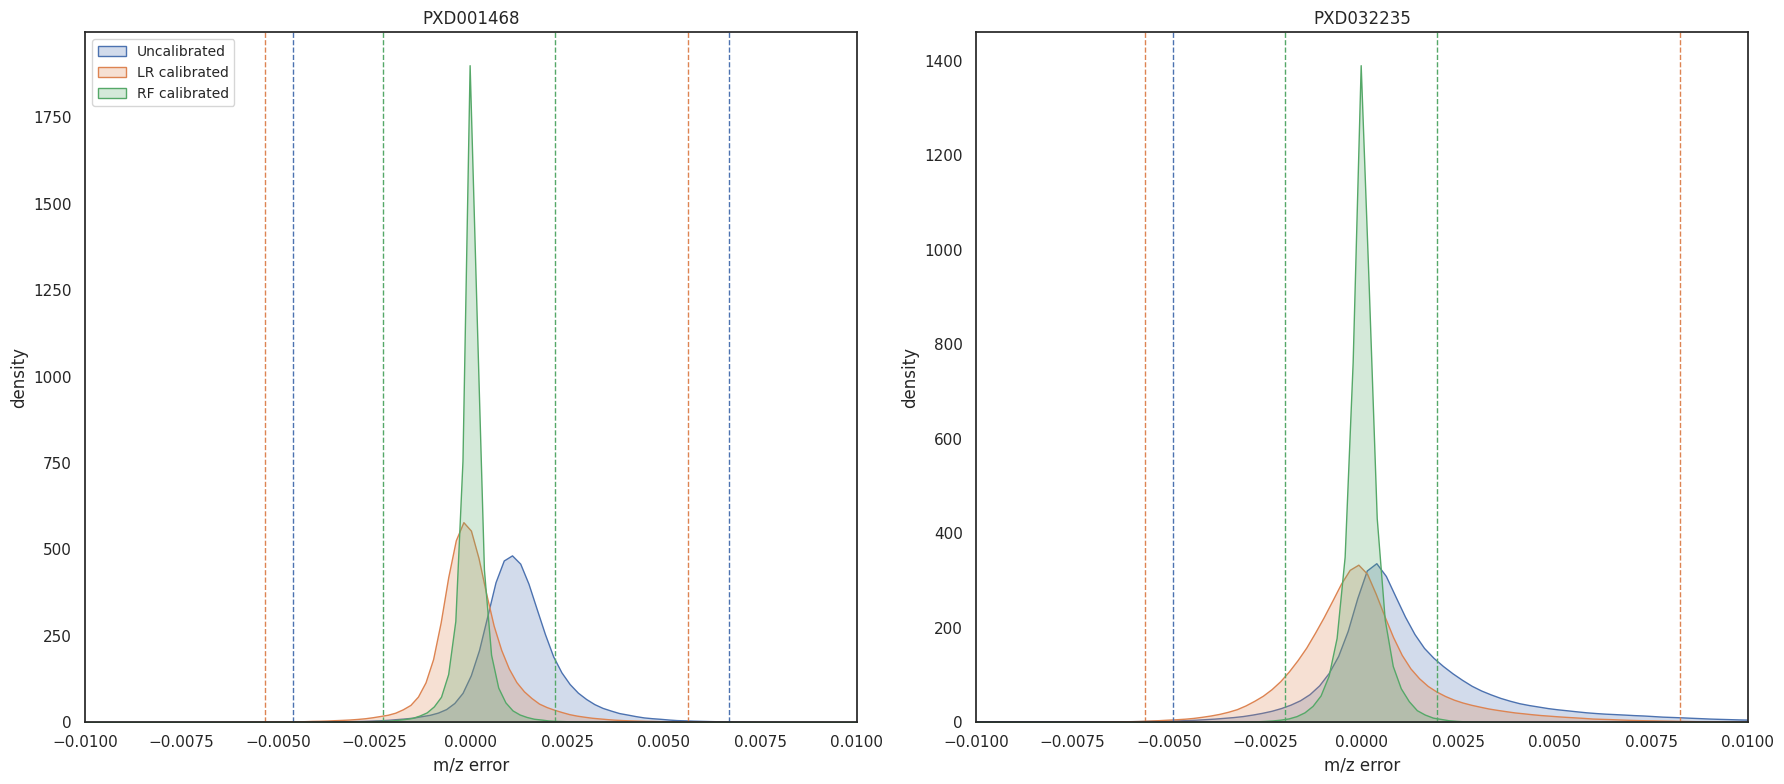

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles

# Set style to white
sns.set(style="white")

# Create a figure and two sets of axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Define columns to plot for both sets of dataframes
columns_to_plot = ['deltaMZ', 'deltaMZ', 'deltaMZ']
dataframes1 = [df_uncal_results_q, df_LRcal_results_q, df_RFcal_results_q]
dataframes2 = [df_uncal_results_nonlin_q, df_LRcal_results_nonlin_q, df_RFcal_results_nonlin_q]
labels = ['Uncalibrated', 'LR calibrated', 'RF calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# Initialize lists to store interval values for both sets of dataframes
interval_values1 = []
interval_values2 = []

# Loop through each dataframe and column, and create overlapping KDE plots for the first set
for df, column, label, color in zip(dataframes1, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax1)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values1.append((quantiles[0], quantiles[1]))

    # Draw interval lines
    ax1.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax1.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)

# Loop through each dataframe and column, and create overlapping KDE plots for the second set
for df, column, label, color in zip(dataframes2, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax2)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values2.append((quantiles[0], quantiles[1]))

    # Draw interval lines
    ax2.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax2.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)

# Set title and labels for the first subplot
ax1.set_title('PXD001468')
ax1.set_xlabel('m/z error')
ax1.set_ylabel('density')

# Set title and labels for the second subplot
ax2.set_title('PXD032235')
ax2.set_xlabel('m/z error')
ax2.set_ylabel('density')

# Move the legend for the first subplot to the top left and adjust font size
ax1.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='small')

ax1.set_xlim(-0.01, 0.01)
ax2.set_xlim(-0.01, 0.01)

# Show plot
plt.tight_layout()
plt.show()

In [9]:
unique_filenames = np.sort(df_uncal_results_q['filename'].unique())
unique_filenames

array(['b1906_293T_proteinID_01A_QE3_122212.mzML',
       'b1922_293T_proteinID_02A_QE3_122212.mzML',
       'b1923_293T_proteinID_03A_QE3_122212.mzML',
       'b1924_293T_proteinID_04A_QE3_122212.mzML',
       'b1925_293T_proteinID_05A_QE3_122212.mzML',
       'b1926_293T_proteinID_06A_QE3_122212.mzML',
       'b1927_293T_proteinID_07A_QE3_122212.mzML',
       'b1928_293T_proteinID_08A_QE3_122212.mzML',
       'b1929_293T_proteinID_09A_QE3_122212.mzML',
       'b1930_293T_proteinID_10A_QE3_122212.mzML',
       'b1931_293T_proteinID_11A_QE3_122212.mzML',
       'b1932_293T_proteinID_12A_QE3_122212.mzML',
       'b1937_293T_proteinID_01B_QE3_122212.mzML',
       'b1938_293T_proteinID_02B_QE3_122212.mzML',
       'b1939_293T_proteinID_03B_QE3_122212.mzML',
       'b1940_293T_proteinID_04B_QE3_122212.mzML',
       'b1941_293T_proteinID_05B_QE3_122212.mzML',
       'b1942_293T_proteinID_06B_QE3_122212.mzML',
       'b1943_293T_proteinID_07B_QE3_122212.mzML',
       'b1944_293T_proteinID_08

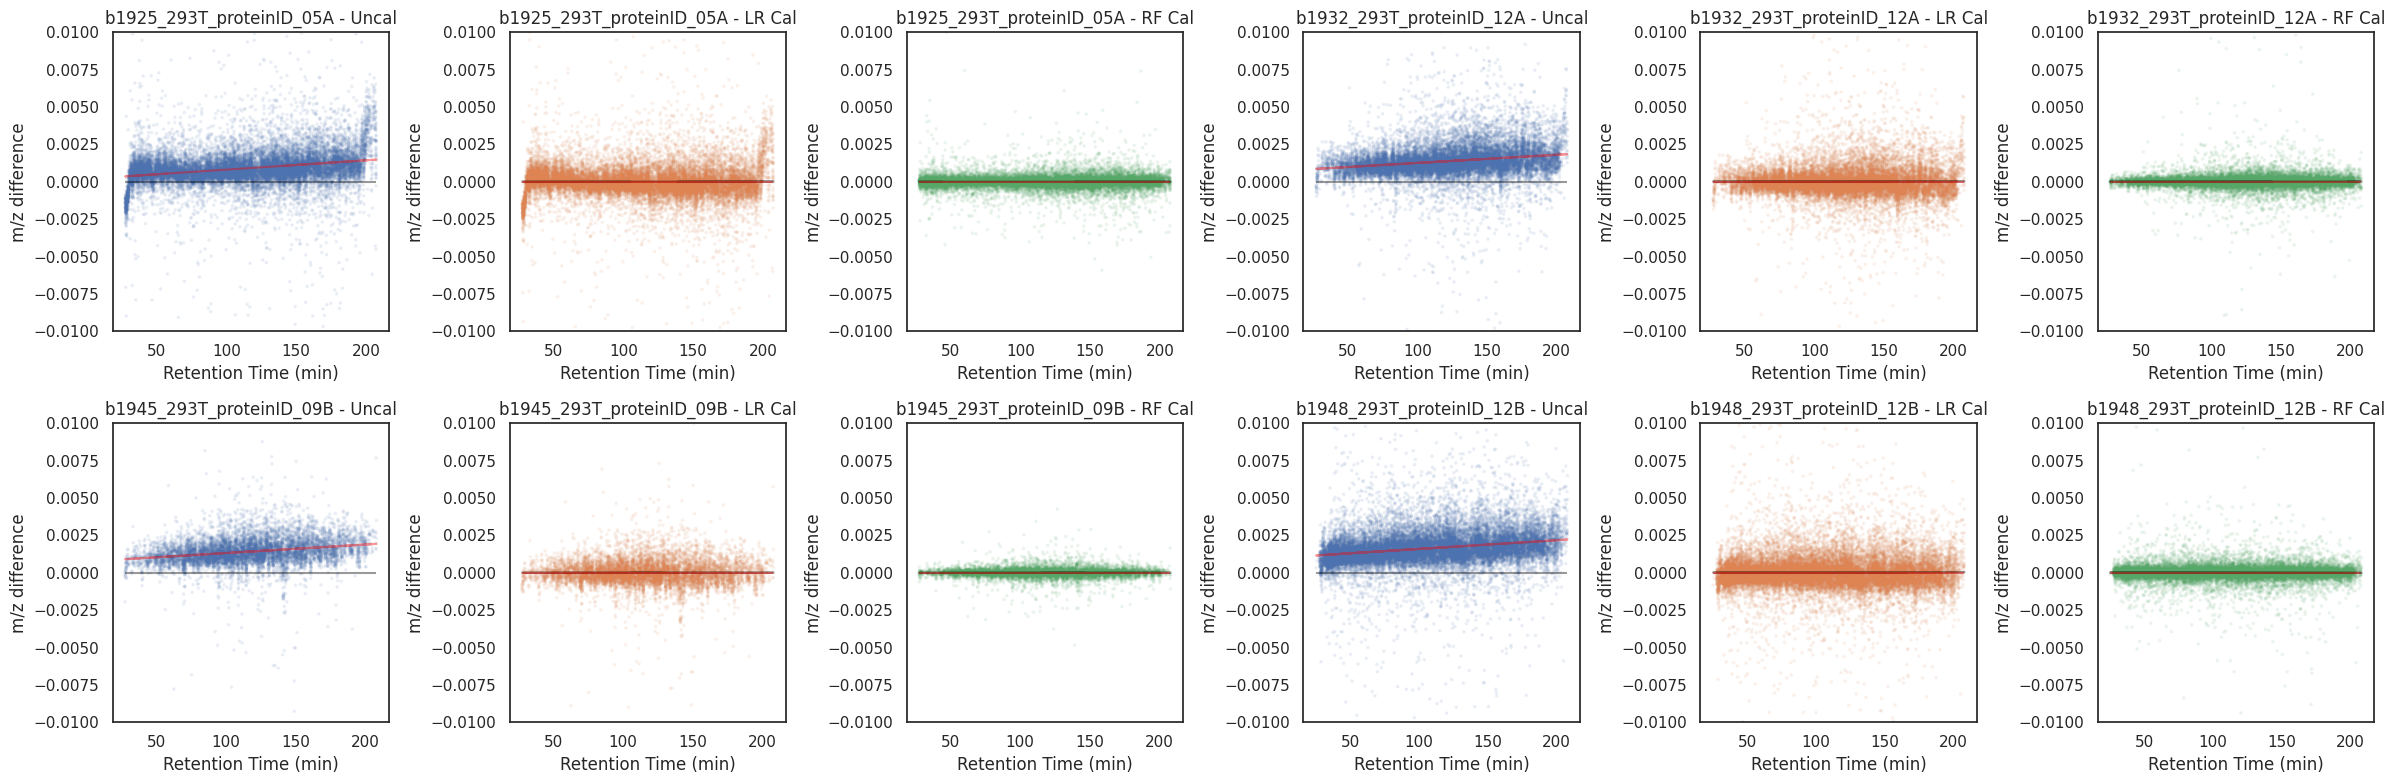

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import numpy as np
import pandas as pd

# List of filenames to plot
filenames_to_plot = [
    'b1925_293T_proteinID_05A_QE3_122212.mzML',
    'b1932_293T_proteinID_12A_QE3_122212.mzML',
    'b1945_293T_proteinID_09B_QE3_122212.mzML',
    'b1948_293T_proteinID_12B_QE3_122212.mzML'
]

# Calculate the number of rows and columns needed
num_rows = 2
num_cols = 6

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 8))

# Flatten axis array for easy indexing
axs = axs.flatten()

# Loop through filenames and plot
for i, filename_to_plot in enumerate(filenames_to_plot):
    # Filter dataframe for the specific filename
    df_subset_uncal = df_uncal_results_q[df_uncal_results_q['filename'] == filename_to_plot]
    df_subset_LRcal = df_LRcal_results_q[df_LRcal_results_q['filename'] == filename_to_plot+'_LRcal.mzML']
    df_subset_RFcal = df_RFcal_results_q[df_RFcal_results_q['filename'] == filename_to_plot+'_RFcal.mzML']

    # Extract the part of the filename before "_QE3..."
    title = filename_to_plot.split('_QE3')[0]
    
    # First subplot (Uncalibrated)
    axs[i*3].scatter(df_subset_uncal['RT'], df_subset_uncal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[0])
    x = df_subset_uncal['RT']
    y = df_subset_uncal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3].plot(x, polynomial(x), color='red', alpha=0.4)
    x_range = df_subset_uncal['RT']
    axs[i*3].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)
    axs[i*3].set_ylim(-0.01, 0.01)
    axs[i*3].set_xlabel('Retention Time (min)')
    axs[i*3].set_ylabel('m/z difference')
    axs[i*3].set_title(f'{title} - Uncal', size = 12)

    # Second subplot (LR Calibrated)
    axs[i*3+1].scatter(df_subset_LRcal['RT'], df_subset_LRcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[1])
    x = df_subset_LRcal['RT']
    y = df_subset_LRcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+1].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+1].set_ylim(-0.01, 0.01)
    axs[i*3+1].set_xlabel('Retention Time (min)')
    axs[i*3+1].set_ylabel('m/z difference')
    axs[i*3+1].set_title(f'{title} - LR Cal', size = 12)

    # Third subplot (RF Calibrated)
    axs[i*3+2].scatter(df_subset_RFcal['RT'], df_subset_RFcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[2])
    x = df_subset_RFcal['RT']
    y = df_subset_RFcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+2].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+2].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+2].set_ylim(-0.01, 0.01)
    axs[i*3+2].set_xlabel('Retention Time (min)')
    axs[i*3+2].set_ylabel('m/z difference')
    axs[i*3+2].set_title(f'{title} - RF Cal', size = 12)

# Adjust layout
plt.tight_layout()
plt.show()

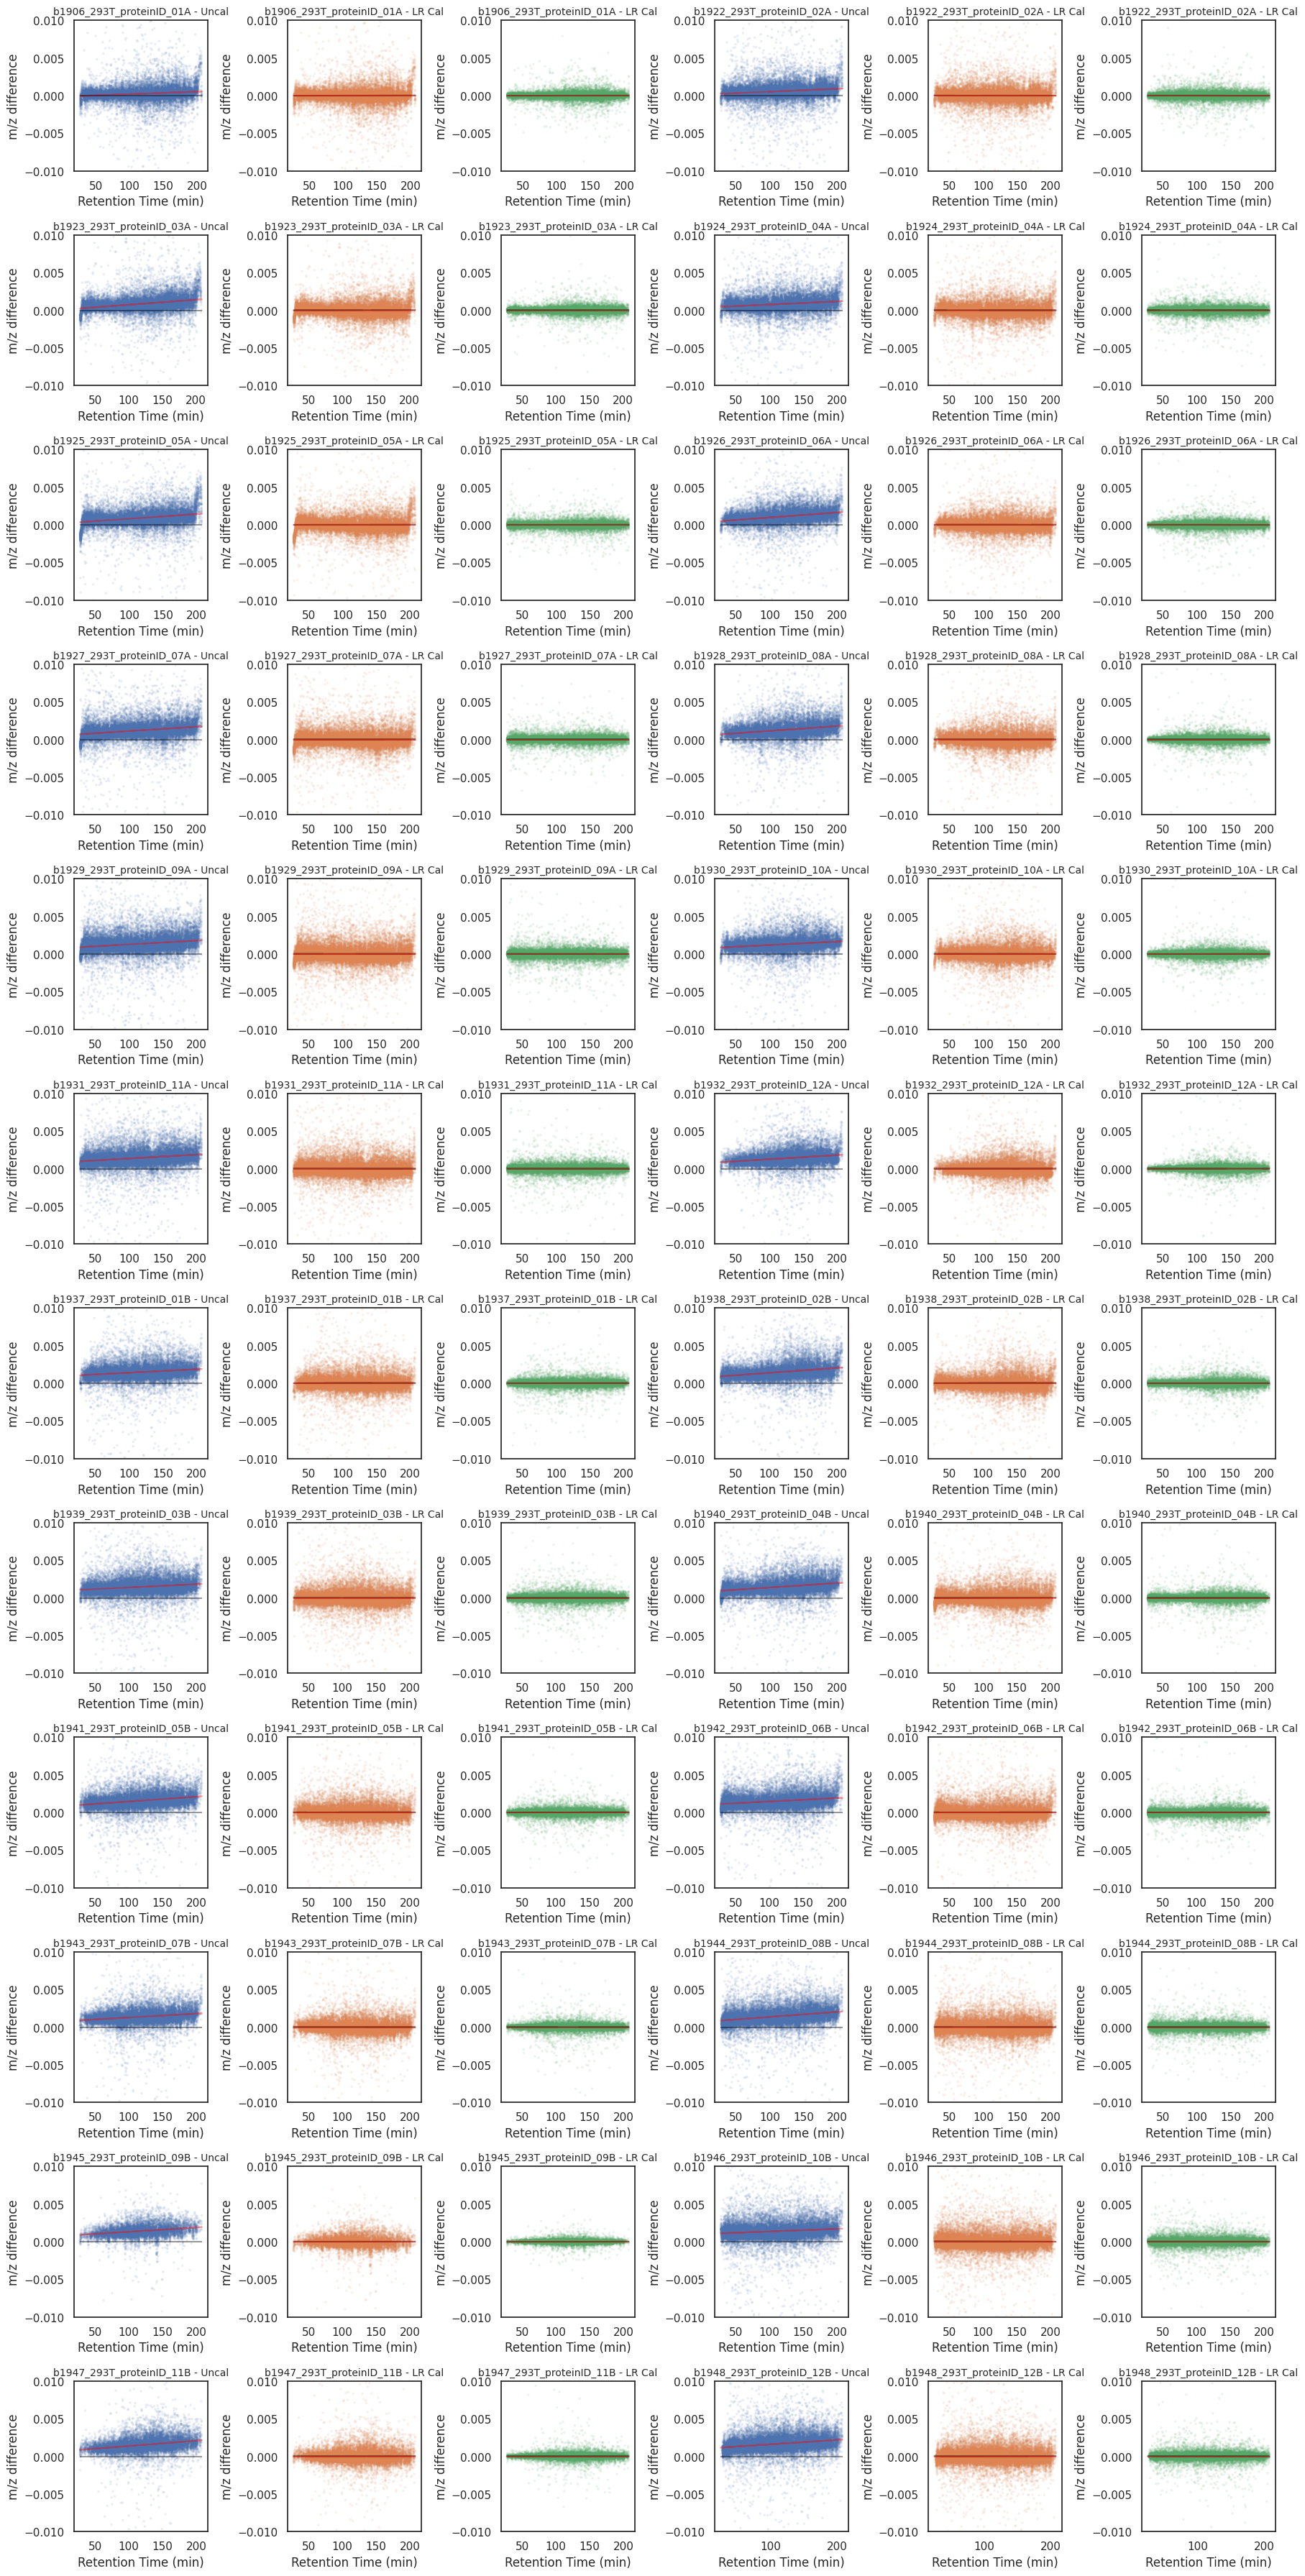

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import numpy as np
import pandas as pd

# Get unique filenames and sort alphabetically
unique_filenames = np.sort(df_uncal_results_q['filename'].unique())

# Calculate the number of rows and columns needed
num_filenames = len(unique_filenames)
num_rows = int(num_filenames / 2) # Ensure at least 3 plots per row
num_cols = 3 * 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 36))

# Flatten axis array for easy indexing
axs = axs.flatten()

# Loop through unique filenames and plot
for i, filename in enumerate(unique_filenames):
    # Filter dataframe for the current filename
    df_subset_uncal = df_uncal_results_q[df_uncal_results_q['filename'] == filename]
    df_subset_LRcal = df_LRcal_results_q[df_LRcal_results_q['filename'] == filename+'_LRcal.mzML']
    df_subset_RFcal = df_RFcal_results_q[df_RFcal_results_q['filename'] == filename+'_RFcal.mzML']
                                        
    # Extract the part of the filename before "_QE3..."
    title = filename.split('_QE3')[0]
    
    # First subplot (Uncalibrated)
    axs[i*3].scatter(df_subset_uncal['RT'], df_subset_uncal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[0])
    x = df_subset_uncal['RT']
    y = df_subset_uncal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3].plot(x, polynomial(x), color='red', alpha=0.4)
    x_range = df_subset_uncal['RT']
    axs[i*3].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)
    axs[i*3].set_ylim(-0.01, 0.01)
    axs[i*3].set_xlabel('Retention Time (min)')
    axs[i*3].set_ylabel('m/z difference')
    axs[i*3].set_title(f'{title} - Uncal', size = 10)

    # Second subplot (LR Calibrated)
    axs[i*3+1].scatter(df_subset_LRcal['RT'], df_subset_LRcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[1])
    x = df_subset_LRcal['RT']
    y = df_subset_LRcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+1].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+1].set_ylim(-0.01, 0.01)
    axs[i*3+1].set_xlabel('Retention Time (min)')
    axs[i*3+1].set_ylabel('m/z difference')
    axs[i*3+1].set_title(f'{title} - LR Cal', size = 10)

    # Third subplot (RF Calibrated)
    axs[i*3+2].scatter(df_subset_RFcal['RT'], df_subset_RFcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[2])
    x = df_subset_RFcal['RT']
    y = df_subset_RFcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+2].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+2].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+2].set_ylim(-0.01, 0.01)
    axs[i*3+2].set_xlabel('Retention Time (min)')
    axs[i*3+2].set_ylabel('m/z difference')
    axs[i*3+2].set_title(f'{title} - LR Cal', size = 10)

# Hide any unused subplots
for i in range(num_filenames * 3, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()

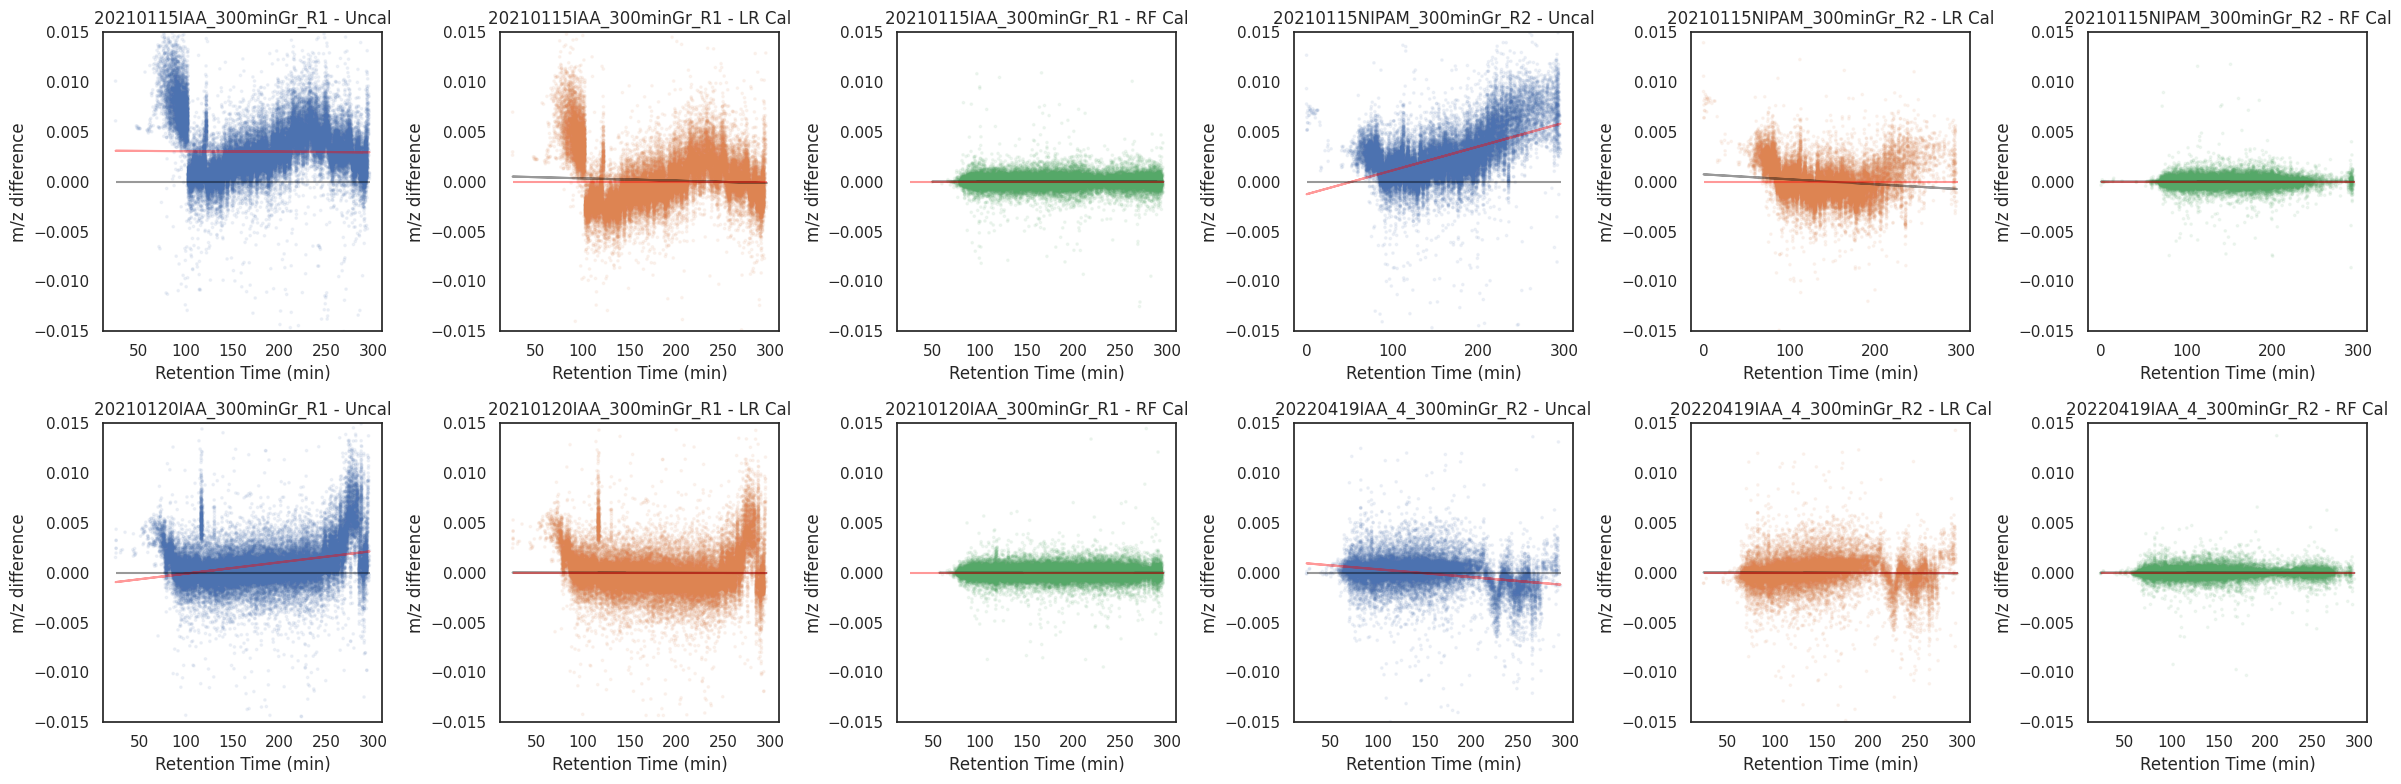

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import numpy as np
import pandas as pd

# List of filenames to plot
filenames_to_plot = [
    '20210115_HM_HEK_IAA_300minGr_R1.mzML',
    '20210115_HM_HEK_NIPAM_300minGr_R2.mzML',
    '20210120_HM_HEK_IAA_300minGr_R1.mzML',
    '20220419_HM_HEK_IAA_4_300minGr_R2.mzML'
]

# Calculate the number of rows and columns needed
num_rows = 2
num_cols = 6

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 8))

# Flatten axis array for easy indexing
axs = axs.flatten()

# Loop through filenames and plot
for i, filename_to_plot in enumerate(filenames_to_plot):
    # Filter dataframe for the specific filename
    df_subset_uncal = df_uncal_results_nonlin_q[df_uncal_results_nonlin_q['filename'] == filename_to_plot]
    df_subset_LRcal = df_LRcal_results_nonlin_q[df_LRcal_results_nonlin_q['filename'] == filename_to_plot+'_LRcal.mzML']
    df_subset_RFcal = df_RFcal_results_nonlin_q[df_RFcal_results_nonlin_q['filename'] == filename_to_plot+'_RFcal.mzML']

    # Extract the part of the filename before "_QE3..."
    title = filename_to_plot.split('_HM')[0] + filename_to_plot.split('HEK_')[1].split('.mzML')[0]
    
    # First subplot (Uncalibrated)
    axs[i*3].scatter(df_subset_uncal['RT'], df_subset_uncal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[0])
    x = df_subset_uncal['RT']
    y = df_subset_uncal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3].plot(x, polynomial(x), color='red', alpha=0.4)
    x_range = df_subset_uncal['RT']
    axs[i*3].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)
    axs[i*3].set_ylim(-0.015, 0.015)
    axs[i*3].set_xlabel('Retention Time (min)')
    axs[i*3].set_ylabel('m/z difference')
    axs[i*3].set_title(f'{title} - Uncal', size = 12)

    # Second subplot (LR Calibrated)
    axs[i*3+1].scatter(df_subset_LRcal['RT'], df_subset_LRcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[1])
    x = df_subset_LRcal['RT']
    y = df_subset_LRcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+1].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+1].set_ylim(-0.015, 0.015)
    axs[i*3+1].set_xlabel('Retention Time (min)')
    axs[i*3+1].set_ylabel('m/z difference')
    axs[i*3+1].set_title(f'{title} - LR Cal', size = 12)

    # Third subplot (RF Calibrated)
    axs[i*3+2].scatter(df_subset_RFcal['RT'], df_subset_RFcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[2])
    x = df_subset_RFcal['RT']
    y = df_subset_RFcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+2].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+2].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+2].set_ylim(-0.015, 0.015)
    axs[i*3+2].set_xlabel('Retention Time (min)')
    axs[i*3+2].set_ylabel('m/z difference')
    axs[i*3+2].set_title(f'{title} - RF Cal', size = 12)

# Adjust layout
plt.tight_layout()
plt.show()

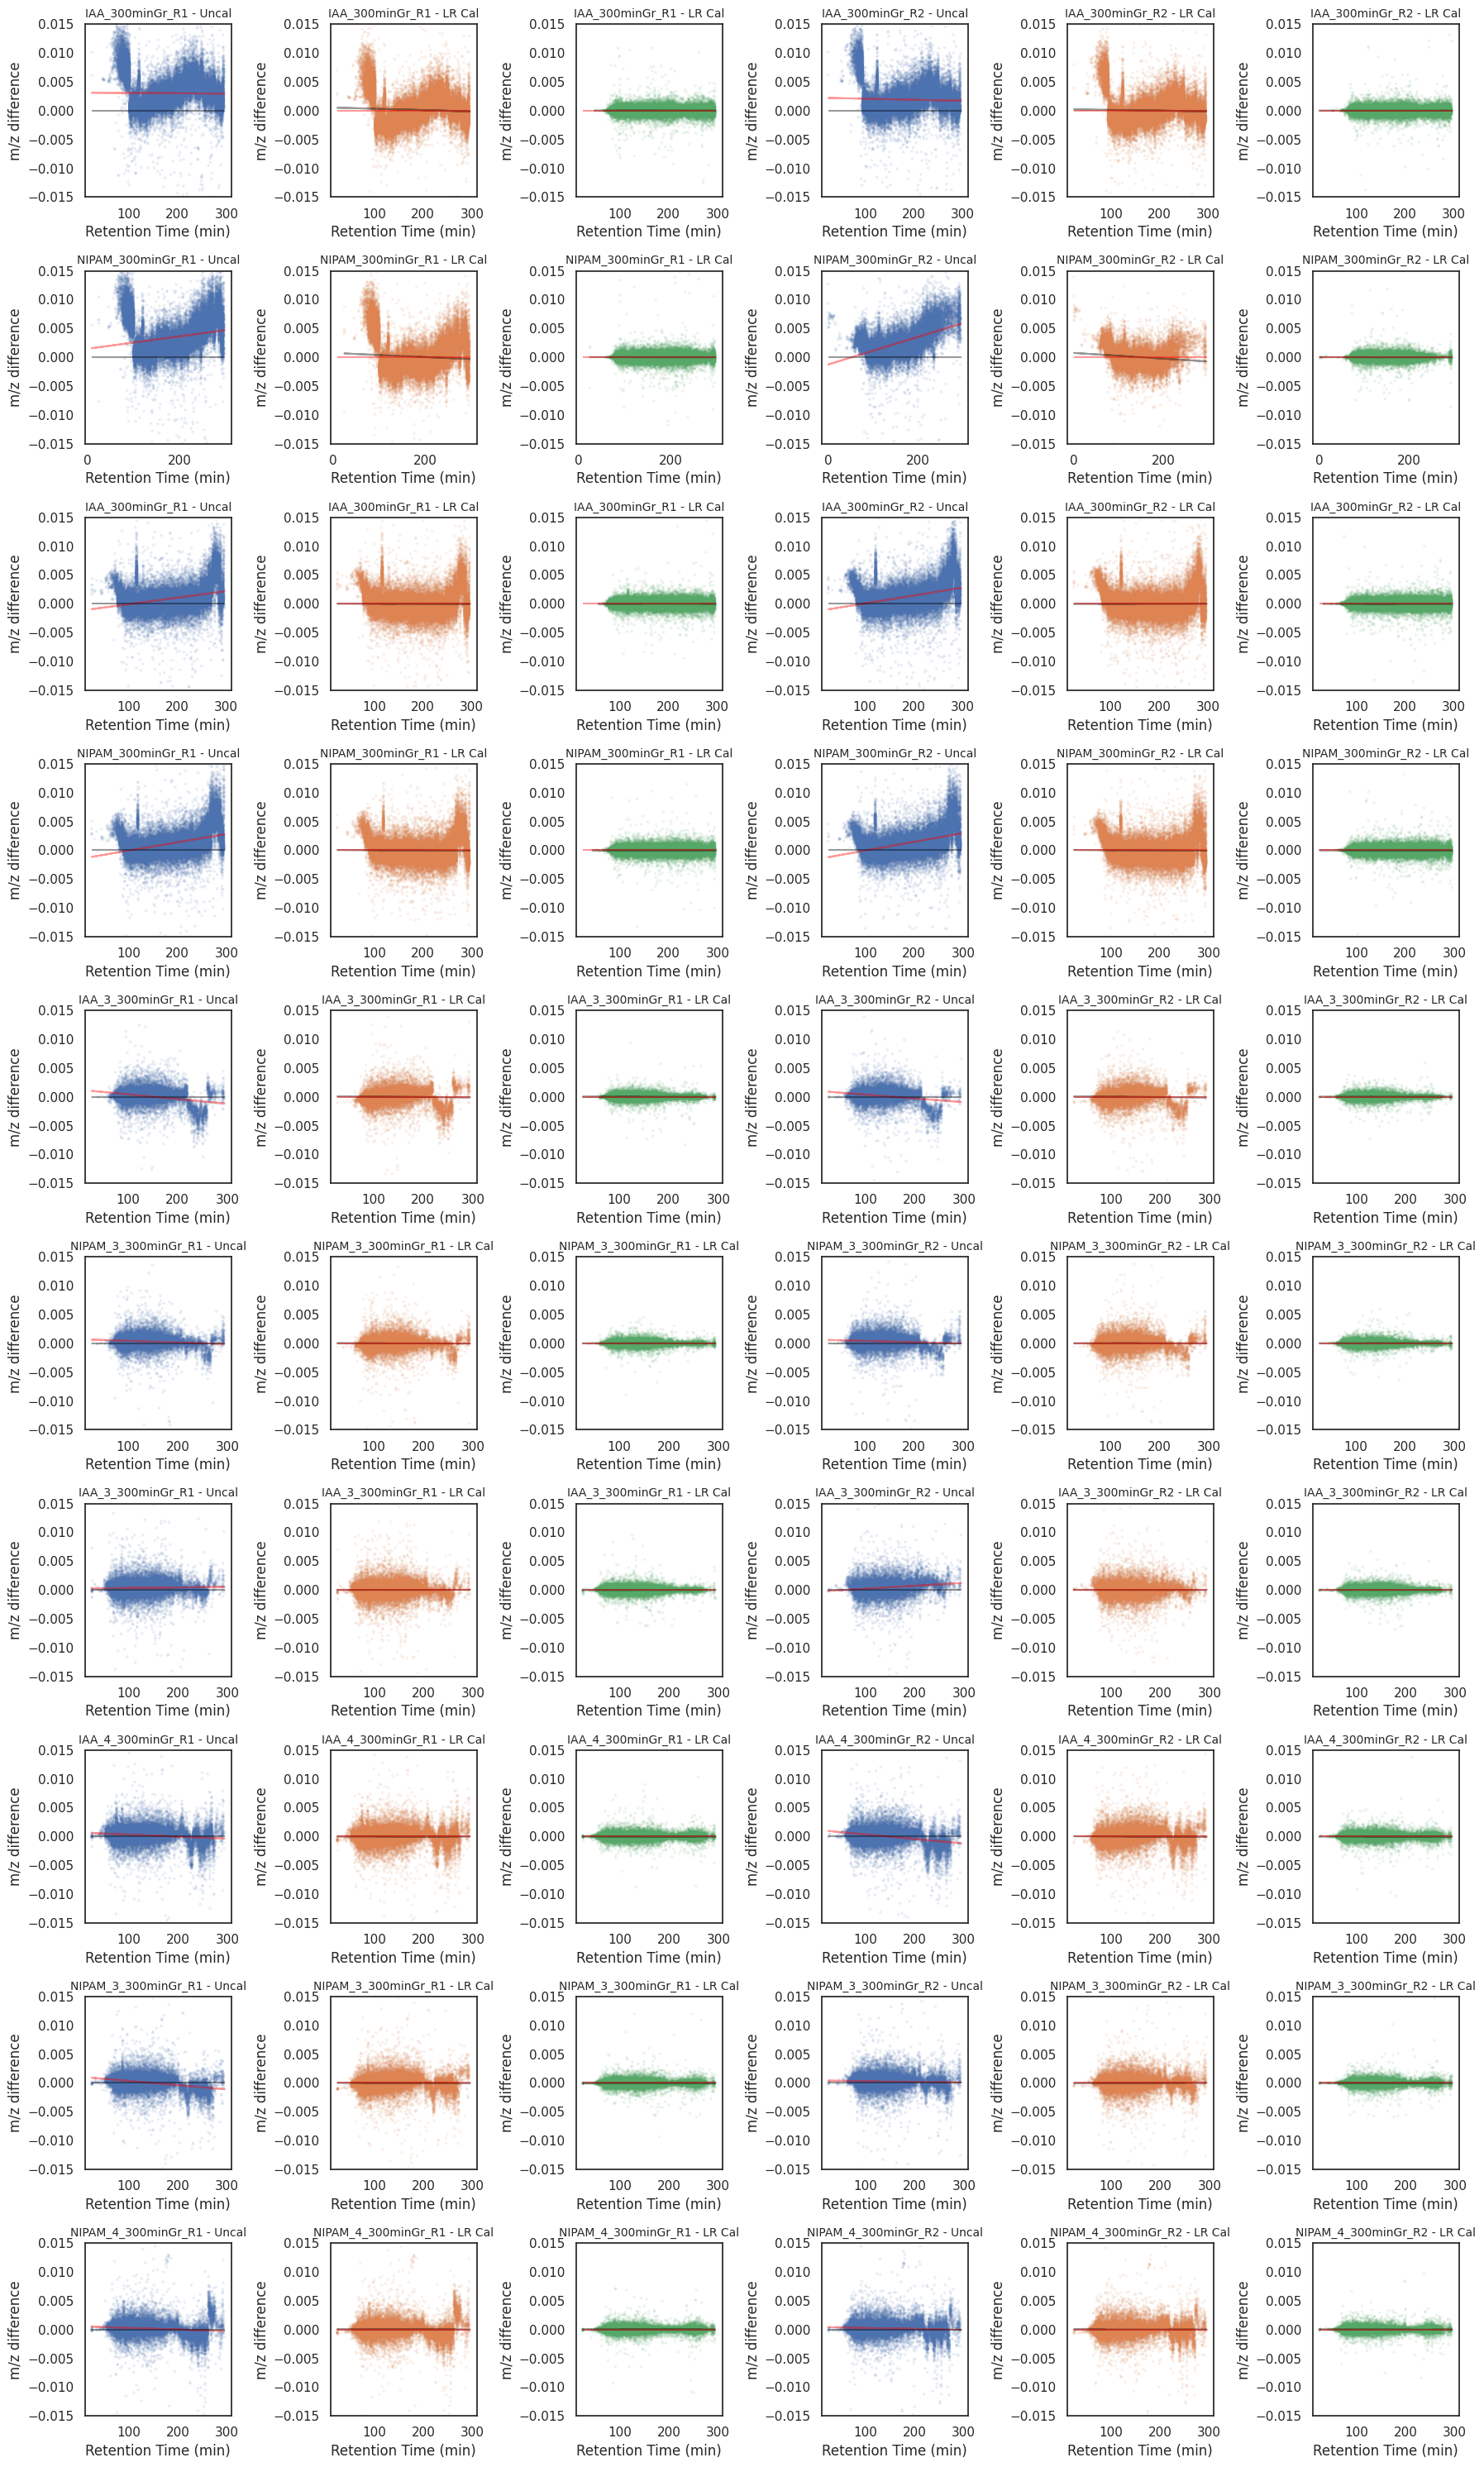

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import numpy as np
import pandas as pd

# Get unique filenames and sort alphabetically
unique_filenames = np.sort(df_uncal_results_nonlin_q['filename'].unique())

# Calculate the number of rows and columns needed
num_filenames = len(unique_filenames)
num_rows = int(num_filenames / 2) # Ensure at least 3 plots per row
num_cols = 3 * 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 30))

# Flatten axis array for easy indexing
axs = axs.flatten()

# Loop through unique filenames and plot
for i, filename in enumerate(unique_filenames):
    # Filter dataframe for the current filename
    df_subset_uncal = df_uncal_results_nonlin_q[df_uncal_results_nonlin_q['filename'] == filename]
    df_subset_LRcal = df_LRcal_results_nonlin_q[df_LRcal_results_nonlin_q['filename'] == filename+'_LRcal.mzML']
    df_subset_RFcal = df_RFcal_results_nonlin_q[df_RFcal_results_nonlin_q['filename'] == filename+'_RFcal.mzML']
                                        
    # Extract the part of the filename before "_QE3..."
    title = filename.split('_HM_HEK_')[1].split('.mzML')[0]
    
    # First subplot (Uncalibrated)
    axs[i*3].scatter(df_subset_uncal['RT'], df_subset_uncal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[0])
    x = df_subset_uncal['RT']
    y = df_subset_uncal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3].plot(x, polynomial(x), color='red', alpha=0.4)
    x_range = df_subset_uncal['RT']
    axs[i*3].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)
    axs[i*3].set_ylim(-0.015, 0.015)
    axs[i*3].set_xlabel('Retention Time (min)')
    axs[i*3].set_ylabel('m/z difference')
    axs[i*3].set_title(f'{title} - Uncal', size = 10)

    # Second subplot (LR Calibrated)
    axs[i*3+1].scatter(df_subset_LRcal['RT'], df_subset_LRcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[1])
    x = df_subset_LRcal['RT']
    y = df_subset_LRcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+1].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+1].set_ylim(-0.015, 0.015)
    axs[i*3+1].set_xlabel('Retention Time (min)')
    axs[i*3+1].set_ylabel('m/z difference')
    axs[i*3+1].set_title(f'{title} - LR Cal', size = 10)

    # Third subplot (RF Calibrated)
    axs[i*3+2].scatter(df_subset_RFcal['RT'], df_subset_RFcal['deltaMZ'], marker='o', linestyle='', alpha=0.075, s=3, color = sns.color_palette()[2])
    x = df_subset_RFcal['RT']
    y = df_subset_RFcal['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[i*3+2].plot(x, polynomial(x), color='black', alpha=0.4)
    axs[i*3+2].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
    axs[i*3+2].set_ylim(-0.015, 0.015)
    axs[i*3+2].set_xlabel('Retention Time (min)')
    axs[i*3+2].set_ylabel('m/z difference')
    axs[i*3+2].set_title(f'{title} - LR Cal', size = 10)

# Hide any unused subplots
for i in range(num_filenames * 3, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of dataframes, columns, names, and colors for the first row
dataframes_lin = [df_uncal_results, df_LRcal_results, df_RFcal_results]
dataframes_nonlin = [df_uncal_results_nonlin, df_LRcal_results_nonlin, df_RFcal_results_nonlin]
columns_to_plot = ['hyperscore', 'hyperscore', 'hyperscore']
names = ['Uncalibrated', 'LR Calibrated', 'RF Calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# Define the list of dataframes, columns, names, and colors for the second row
dataframes_lin_q = [df_uncal_results_q, df_LRcal_results_q, df_RFcal_results_q]
dataframes_nonlin_q = [df_uncal_results_nonlin_q, df_LRcal_results_nonlin_q, df_RFcal_results_nonlin_q]

# Set up the figure and axes for two rows
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot for linear data in the first row
for df, column, color, name in zip(dataframes_lin, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[0, 0], label=name, shade=True, color=color)

# Set title and labels for linear data in the first row
axes[0, 0].set_title('unfiltered')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('PXD001468\ndensity')

# Plot for non-linear data in the first row
for df, column, color, name in zip(dataframes_lin_q, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[0, 1], label=name, shade=True, color=color)

# Set title and labels for non-linear data in the first row
axes[0, 1].set_title('spectrum q < 0.01 filtered')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# Plot for linear data in the second row
for df, column, color, name in zip(dataframes_nonlin, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[1, 0], label=name, shade=True, color=color)

# Set title and labels for linear data in the second row
axes[1, 0].set_xlabel('hyperscore')
axes[1, 0].set_ylabel('PXD032235\ndensity')
axes[1, 0].legend()

# Plot for non-linear data in the second row
for df, column, color, name in zip(dataframes_nonlin_q, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[1, 1], label=name, shade=True, color=color)

# Set title and labels for non-linear data in the second row
axes[1, 1].set_xlabel('hyperscore')
axes[1, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

NameError: name 'df_uncal_results' is not defined

In [69]:
df_LRcal_results_q['filename'] = df_LRcal_results_q['filename'].str.split('_LRcal.mzML').str[0]

/tmp/ipykernel_1745352/4092036886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LRcal_results_q['filename'] = df_LRcal_results_q['filename'].str.split('_LRcal.mzML').str[0]


In [71]:
df_RFcal_results_q['filename'] = df_RFcal_results_q['filename'].str.split('_RFcal.mzML').str[0]

/tmp/ipykernel_1745352/3801436745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFcal_results_q['filename'] = df_RFcal_results_q['filename'].str.split('_RFcal.mzML').str[0]


In [74]:
df_LRcal_results_nonlin_q['filename'] = df_LRcal_results_nonlin_q['filename'].str.split('_LRcal.mzML').str[0]

/tmp/ipykernel_1745352/1475765995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LRcal_results_nonlin_q['filename'] = df_LRcal_results_nonlin_q['filename'].str.split('_LRcal.mzML').str[0]


In [75]:
df_RFcal_results_nonlin_q['filename'] = df_RFcal_results_nonlin_q['filename'].str.split('_LRcal.mzML').str[0]

/tmp/ipykernel_1745352/3896154516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFcal_results_nonlin_q['filename'] = df_RFcal_results_nonlin_q['filename'].str.split('_LRcal.mzML').str[0]


In [76]:
merged_data = df_uncal_results_q.merge(df_LRcal_results_q, on=['filename', 'scannr'], how='outer', suffixes=('_uncal', ''))
merged_data = merged_data.merge(df_RFcal_results_q, on=['filename', 'scannr'], how='outer', suffixes=('_calLIN', '_calRF'))
merged_data.head()
print(merged_data.shape)

merged_data_nonlin = df_uncal_results_nonlin_q.merge(df_LRcal_results_nonlin_q, on=['filename', 'scannr'], how='outer', suffixes=('_uncal', ''))
merged_data_nonlin = merged_data_nonlin.merge(df_RFcal_results_nonlin_q, on=['filename', 'scannr'], how='outer', suffixes=('_calLIN', '_calRF'))
merged_data_nonlin.head()
print(merged_data_nonlin.shape)

(424859, 104)
(1057436, 104)


In [82]:
merged_data.head(5)

peptide_uncal         proteins_uncal  \
0  VVDLM[+15.9949]AHM[+15.9949]ASKE    sp|P04406|G3P_HUMAN   
1               LEMEM[+15.9949]EAAR   sp|Q15233|NONO_HUMAN   
2        NKEDQYDHLDAADM[+15.9949]TK  sp|P34932|HSP74_HUMAN   
3   EGM[+15.9949]NIVEAM[+15.9949]ER   sp|P62937|PPIA_HUMAN   
4        NKEDQYDHLDAADM[+15.9949]TK  sp|P34932|HSP74_HUMAN   

   num_proteins_uncal                                  filename  \
0                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
1                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
2                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
3                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
4                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   

                                           scannr  rank_uncal  label_uncal  \
0  controllerType=0 controllerNumber=1 scan=10003         1.0          1.0   
1  controllerType=0 controllerNumber=1 scan=10007         1.0          1.0   
2  controllerType=0 controllerNumber=1 scan=10008         1.0          1.0   
3  controllerType=0 controllerNumber=1 scan=10010         1.0          1.0   
4  controllerType=0 controllerNumber=1 scan=10014         1.0          1.0   

   expmass_uncal  calcmass_uncal  charge_uncal  peptide_len_uncal  \
0      1361.6330       1361.6318           3.0               12.0   
1      1094.4741       1094.4735           2.0                9.0   
2      1908.8169       1908.8160           3.0               16.0   
3      1309.5648       1309.5642           2.0               11.0   
4      1908.8197       1908.8160           4.0               16.0   

   missed_cleavages_uncal  isotope_error_uncal  precursor_ppm_uncal  \
0                     1.0                  0.0             0.896500   
1                     0.0                  0.0             0.557667   
2                     1.0                  0.0             0.447655   
3                     0.0                  0.0             0.466072   
4                     1.0                  0.0             1.918522   

   fragment_ppm_uncal  hyperscore_uncal  delta_next_uncal  delta_best_uncal  \
0            4.375629         30.124586          6.346083               0.0   
1            0.476016         40.167871          5.637388               0.0   
2            2.592913         35.697416         35.697416               0.0   
3            1.112928         45.016672         17.661144               0.0   
4            1.613910         38.451390         38.451390               0.0   

    rt_uncal  aligned_rt_uncal  predicted_rt_uncal  delta_rt_model_uncal  \
0  52.260452          0.251590            0.436117              0.184526   
1  52.277340          0.251672            0.367301              0.115629   
2  52.278896          0.251679            0.302393              0.050713   
3  52.285366          0.251711            0.503638              0.251927   
4  52.298565          0.251774            0.302393              0.050618   

   matched_peaks_uncal  longest_b_uncal  longest_y_uncal  longest_y_pct_uncal  \
0                  8.0              2.0              6.0             0.500000   
1                 10.0              2.0              7.0             0.777778   
2                 11.0              3.0              7.0             0.437500   
3                 12.0              4.0              5.0             0.454545   
4                 12.0              4.0              7.0             0.437500   

   matched_intensity_pct_uncal  scored_candidates_uncal  poisson_uncal  \
0                     8.123695                     30.0      -4.859530   
1                    42.948696                     25.0      -5.996284   
2                    29.937500                      5.0      -4.683022   
3                    35.795124                     33.0      -7.709462   
4                    18.895079                      8.0      -5.967885   

   sage_discriminant_score_uncal  posterior_error_uncal  spectrum_q_unc

/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

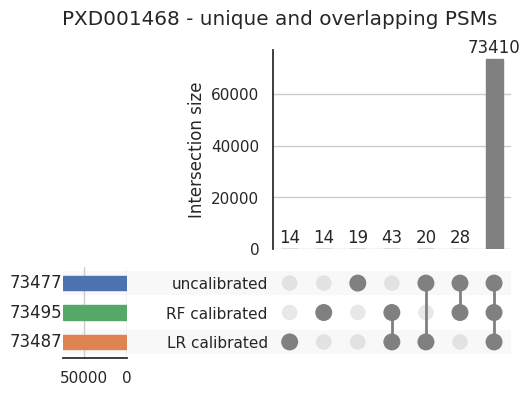

In [83]:
df_uncal_scannr = set(df_uncal_results_q['scannr'])
df_calLIN_scannr = set(df_LRcal_results_q['scannr'])
df_calRF_scannr = set(df_RFcal_results_q['scannr'])

len_uncal = len(df_uncal_scannr - df_calLIN_scannr - df_calRF_scannr)
len_LRcal = len(df_calLIN_scannr - df_uncal_scannr - df_calRF_scannr)
len_RFcal = len(df_calRF_scannr - df_uncal_scannr - df_calLIN_scannr)
len_unLRcal = len(df_uncal_scannr & df_calLIN_scannr - df_calRF_scannr)
len_unRFcal = len(df_uncal_scannr & df_calRF_scannr - df_calLIN_scannr)
len_LRRFcal = len(df_calLIN_scannr & df_calRF_scannr - df_uncal_scannr)
len_all = len(df_uncal_scannr & df_calLIN_scannr & df_calRF_scannr)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships, UpSet
import seaborn as sns

example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[len_RFcal, len_LRcal, len_LRRFcal, len_uncal, len_unRFcal, len_unLRcal, len_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD001468 - unique and overlapping PSMs")
plt.show()

/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

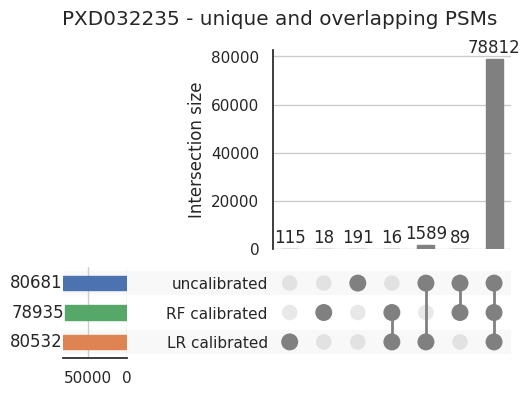

In [84]:
df_uncal_scannr = set(df_uncal_results_nonlin_q['scannr'])
df_calLIN_scannr = set(df_LRcal_results_nonlin_q['scannr'])
df_calRF_scannr = set(df_RFcal_results_nonlin_q['scannr'])

len_uncal = len(df_uncal_scannr - df_calLIN_scannr - df_calRF_scannr)
len_LRcal = len(df_calLIN_scannr - df_uncal_scannr - df_calRF_scannr)
len_RFcal = len(df_calRF_scannr - df_uncal_scannr - df_calLIN_scannr)
len_unLRcal = len(df_uncal_scannr & df_calLIN_scannr - df_calRF_scannr)
len_unRFcal = len(df_uncal_scannr & df_calRF_scannr - df_calLIN_scannr)
len_LRRFcal = len(df_calLIN_scannr & df_calRF_scannr - df_uncal_scannr)
len_all = len(df_uncal_scannr & df_calLIN_scannr & df_calRF_scannr)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships
example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[len_RFcal, len_LRcal, len_LRRFcal, len_uncal, len_unRFcal, len_unLRcal, len_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD032235 - unique and overlapping PSMs")
plt.show()

In [85]:
df_uncal_results_qpep = df_uncal_results[df_uncal_results["peptide_q"] < 0.01]
unique_peptides = set(df_uncal_results_qpep["peptide"])
num_unique_peptides = len(unique_peptides)
print("Number of unique peptides with peptide_q < 0.01:", num_unique_peptides)

# For df_LRcal_results
df_LRcal_results_qpep = df_LRcal_results[df_LRcal_results["peptide_q"] < 0.01]
unique_peptides_LRcal = set(df_LRcal_results_qpep["peptide"])
num_unique_peptides_LRcal = len(unique_peptides_LRcal)
print("Number of unique peptides in LR Calibrated results with peptide_q < 0.01:", num_unique_peptides_LRcal)

# For df_RFcal_results
df_RFcal_results_qpep = df_RFcal_results[df_RFcal_results["peptide_q"] < 0.01]
unique_peptides_RFcal = set(df_RFcal_results_qpep["peptide"])
num_unique_peptides_RFcal = len(unique_peptides_RFcal)
print("Number of unique peptides in RF Calibrated results with peptide_q < 0.01:", num_unique_peptides_RFcal)

# For df_uncal_results_nonlin
df_uncal_results_nonlin_qpep = df_uncal_results_nonlin[df_uncal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_uncal_nonlin = set(df_uncal_results_nonlin_qpep["peptide"])
num_unique_peptides_uncal_nonlin = len(unique_peptides_uncal_nonlin)
print("Number of unique peptides in Uncalibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_uncal_nonlin)

# For df_LRcal_results_nonlin
df_LRcal_results_nonlin_qpep = df_LRcal_results_nonlin[df_LRcal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_LRcal_nonlin = set(df_LRcal_results_nonlin_qpep["peptide"])
num_unique_peptides_LRcal_nonlin = len(unique_peptides_LRcal_nonlin)
print("Number of unique peptides in LR Calibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_LRcal_nonlin)

# For df_RFcal_results_nonlin
df_RFcal_results_nonlin_qpep = df_RFcal_results_nonlin[df_RFcal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_RFcal_nonlin = set(df_RFcal_results_nonlin_qpep["peptide"])
num_unique_peptides_RFcal_nonlin = len(unique_peptides_RFcal_nonlin)
print("Number of unique peptides in RF Calibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_RFcal_nonlin)

Number of unique peptides with peptide_q < 0.01: 119331
Number of unique peptides in LR Calibrated results with peptide_q < 0.01: 119646
Number of unique peptides in RF Calibrated results with peptide_q < 0.01: 119858
Number of unique peptides in Uncalibrated Non-linear results with peptide_q < 0.01: 51834
Number of unique peptides in LR Calibrated Non-linear results with peptide_q < 0.01: 50450
Number of unique peptides in RF Calibrated Non-linear results with peptide_q < 0.01: 51386


In [92]:
merged_datapep = df_uncal_results_qpep.merge(df_LRcal_results_qpep, on=['filename', 'scannr'], how='outer', suffixes=('_uncal', ''))
merged_datapep = merged_datapep.merge(df_RFcal_results_qpep, on=['filename', 'scannr'], how='outer', suffixes=('_calLIN', '_calRF'))
merged_datapep.head()
print(merged_datapep.shape)

merged_data_nonlinpep = df_uncal_results_nonlin_qpep.merge(df_LRcal_results_nonlin_qpep, on=['filename', 'scannr'], how='outer', suffixes=('_uncal', ''))
merged_data_nonlinpep = merged_data_nonlinpep.merge(df_RFcal_results_nonlin_qpep, on=['filename', 'scannr'], how='outer', suffixes=('_calLIN', '_calRF'))
merged_data_nonlinpep.head()
print(merged_data_nonlinpep.shape)

(1409332, 104)
(1604423, 104)


In [93]:
merged_datapep.head(5)

peptide_uncal         proteins_uncal  \
0  VVDLM[+15.9949]AHM[+15.9949]ASKE    sp|P04406|G3P_HUMAN   
1               LEMEM[+15.9949]EAAR   sp|Q15233|NONO_HUMAN   
2        NKEDQYDHLDAADM[+15.9949]TK  sp|P34932|HSP74_HUMAN   
3   EGM[+15.9949]NIVEAM[+15.9949]ER   sp|P62937|PPIA_HUMAN   
4        NKEDQYDHLDAADM[+15.9949]TK  sp|P34932|HSP74_HUMAN   

   num_proteins_uncal                                  filename  \
0                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
1                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
2                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
3                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   
4                 1.0  b1906_293T_proteinID_01A_QE3_122212.mzML   

                                           scannr  rank_uncal  label_uncal  \
0  controllerType=0 controllerNumber=1 scan=10003         1.0          1.0   
1  controllerType=0 controllerNumber=1 scan=10007         1.0          1.0   
2  controllerType=0 controllerNumber=1 scan=10008         1.0          1.0   
3  controllerType=0 controllerNumber=1 scan=10010         1.0          1.0   
4  controllerType=0 controllerNumber=1 scan=10014         1.0          1.0   

   expmass_uncal  calcmass_uncal  charge_uncal  peptide_len_uncal  \
0      1361.6330       1361.6318           3.0               12.0   
1      1094.4741       1094.4735           2.0                9.0   
2      1908.8169       1908.8160           3.0               16.0   
3      1309.5648       1309.5642           2.0               11.0   
4      1908.8197       1908.8160           4.0               16.0   

   missed_cleavages_uncal  isotope_error_uncal  precursor_ppm_uncal  \
0                     1.0                  0.0             0.896500   
1                     0.0                  0.0             0.557667   
2                     1.0                  0.0             0.447655   
3                     0.0                  0.0             0.466072   
4                     1.0                  0.0             1.918522   

   fragment_ppm_uncal  hyperscore_uncal  delta_next_uncal  delta_best_uncal  \
0            4.375629         30.124586          6.346083               0.0   
1            0.476016         40.167871          5.637388               0.0   
2            2.592913         35.697416         35.697416               0.0   
3            1.112928         45.016672         17.661144               0.0   
4            1.613910         38.451390         38.451390               0.0   

    rt_uncal  aligned_rt_uncal  predicted_rt_uncal  delta_rt_model_uncal  \
0  52.260452          0.251590            0.436117              0.184526   
1  52.277340          0.251672            0.367301              0.115629   
2  52.278896          0.251679            0.302393              0.050713   
3  52.285366          0.251711            0.503638              0.251927   
4  52.298565          0.251774            0.302393              0.050618   

   matched_peaks_uncal  longest_b_uncal  longest_y_uncal  longest_y_pct_uncal  \
0                  8.0              2.0              6.0             0.500000   
1                 10.0              2.0              7.0             0.777778   
2                 11.0              3.0              7.0             0.437500   
3                 12.0              4.0              5.0             0.454545   
4                 12.0              4.0              7.0             0.437500   

   matched_intensity_pct_uncal  scored_candidates_uncal  poisson_uncal  \
0                     8.123695                     30.0      -4.859530   
1                    42.948696                     25.0      -5.996284   
2                    29.937500                      5.0      -4.683022   
3                    35.795124                     33.0      -7.709462   
4                    18.895079                      8.0      -5.967885   

   sage_discriminant_score_uncal  posterior_error_uncal  spectrum_q_unc

/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

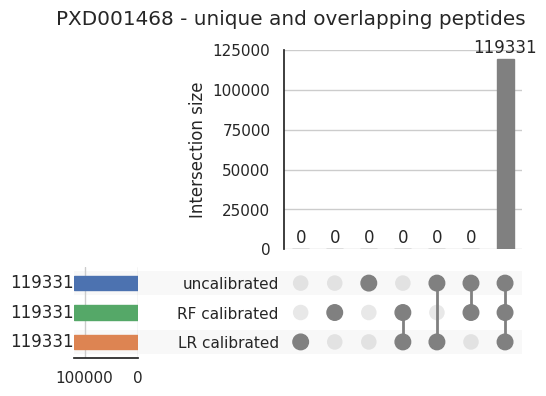

In [94]:
# Extract peptide sequences from each dataset
peptides_uncal = set(merged_datapep['peptide_uncal'].dropna())
peptides_calLIN = set(merged_datapep['peptide_uncal'].dropna())
peptides_calRF = set(merged_datapep['peptide_uncal'].dropna())

# Find overlaps
overlap_uncal_calLIN = peptides_uncal.intersection(peptides_calLIN)
overlap_uncal_calRF = peptides_uncal.intersection(peptides_calRF)
overlap_calLIN_calRF = peptides_calLIN.intersection(peptides_calRF)
overlap_uncal_calLIN_calRF = peptides_uncal.intersection(peptides_calLIN, peptides_calRF)

peplen_uncal = len(peptides_uncal - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_LRcal = len(peptides_calLIN - overlap_uncal_calLIN - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_RFcal = len(peptides_calRF - overlap_uncal_calRF - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_unLRcal = len(overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_unRFcal = len(overlap_uncal_calRF - overlap_uncal_calLIN - overlap_uncal_calLIN_calRF)
peplen_LRRFcal = len(overlap_calLIN_calRF - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_all = len(overlap_uncal_calLIN_calRF)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships
example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[peplen_RFcal, peplen_LRcal, peplen_LRRFcal, peplen_uncal, peplen_unRFcal, peplen_unLRcal, peplen_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD001468 - unique and overlapping peptides")
plt.show()

In [91]:
# Extract peptide sequences from each dataset
peptides_uncal = set(merged_data_nonlinpep['peptide_uncal'].dropna())
peptides_calLIN = set(merged_data_nonlinpep['peptide_calLIN'].dropna())
peptides_calRF = set(merged_data_nonlinpep['peptide_calRF'].dropna())

# Find overlaps
overlap_uncal_calLIN = peptides_uncal.intersection(peptides_calLIN)
overlap_uncal_calRF = peptides_uncal.intersection(peptides_calRF)
overlap_calLIN_calRF = peptides_calLIN.intersection(peptides_calRF)
overlap_uncal_calLIN_calRF = peptides_uncal.intersection(peptides_calLIN, peptides_calRF)

peplen_uncal = len(peptides_uncal - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_LRcal = len(peptides_calLIN - overlap_uncal_calLIN - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_RFcal = len(peptides_calRF - overlap_uncal_calRF - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_unLRcal = len(overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_unRFcal = len(overlap_uncal_calRF - overlap_uncal_calLIN - overlap_uncal_calLIN_calRF)
peplen_LRRFcal = len(overlap_calLIN_calRF - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_all = len(overlap_uncal_calLIN_calRF)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships
example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[peplen_RFcal, peplen_LRcal, peplen_LRRFcal, peplen_uncal, peplen_unRFcal, peplen_unLRcal, peplen_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD032235 - unique and overlapping peptides")
plt.show()

KeyError: 'peptide_uncal'

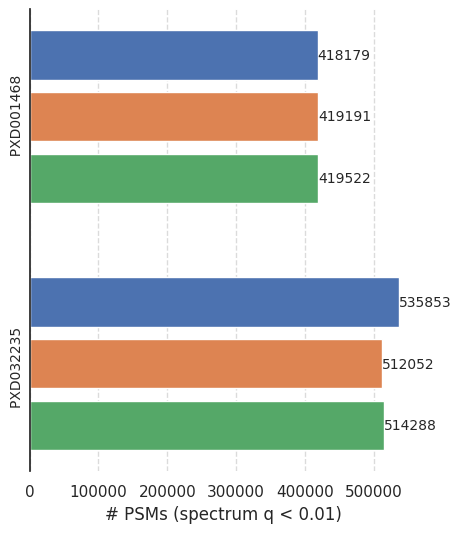

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import numpy as np
import pandas as pd

# Data
datasets = ['PXD001468 Uncal', 'PXD001468 LRcal', 'PXD001468 RFcal', '', 'PXD032235 Uncal', 'PXD032235 LRcal', ' PXD032235 RFcal']
q_lengths = [len(df_uncal_results_q), len(df_LRcal_results_q), len(df_RFcal_results_q), 0, len(df_uncal_results_nonlin_q), len(df_LRcal_results_nonlin_q), len(df_RFcal_results_nonlin_q)]

# Reverse the order of datasets and their lengths
datasets.reverse()
q_lengths.reverse()

# Plot
plt.figure(figsize=(5, 6))
bars = plt.barh(datasets, q_lengths, color=(sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[0], 'white', sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[0]))  # Adjust colors
plt.xlabel('# PSMs (spectrum q < 0.01)', fontsize=12)
plt.ylabel('PXD032235                                       PXD001468', fontsize=10)

# Add text annotations
for bar, length in zip(bars, q_lengths):
    if length != 0:
        plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, f'{length}', 
                 va='center', ha='left', fontsize=10)

# Remove black lines around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add legend with smaller font size and lower position
legend_patches = [
    mpatches.Patch(color=sns.color_palette()[0], label='Uncalibrated'),
    mpatches.Patch(color=sns.color_palette()[1], label='LR Calibrated'),
    mpatches.Patch(color=sns.color_palette()[2], label='RF Calibrated')
]
#plt.legend(handles=legend_patches, fontsize=9, bbox_to_anchor=(0.930, 0.970), loc='upper center')

# Hide labels on y-axis
plt.yticks([])

plt.show()

In [5]:
df_uncal_peptides_q = set(df_uncal_results_nonlin_qpep['peptide'])
df_LRcal_peptides_q = set(df_LRcal_results_nonlin_qpep['peptide'])
df_RFcal_peptides_q = set(df_RFcal_results_nonlin_qpep['peptide'])
df_uncal_peptides_nonlin_q = set(df_uncal_results_nonlin_qpep['peptide'])
df_LRcal_peptides_nonlin_q = set(df_LRcal_results_nonlin_qpep['peptide'])
df_RFcal_peptides_nonlin_q = set(df_RFcal_results_nonlin_qpep['peptide'])

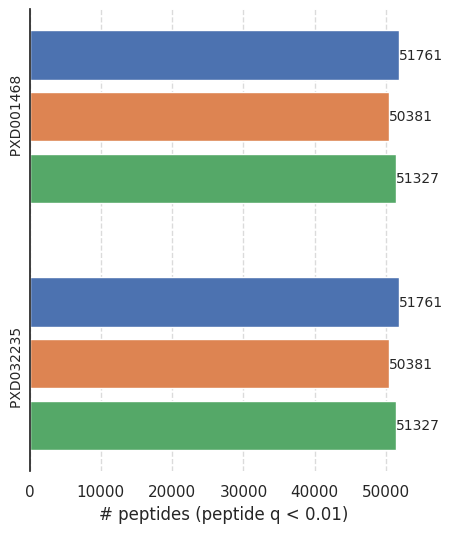

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
import numpy as np
import pandas as pd

# Data
datasets = ['PXD001468 Uncal', 'PXD001468 LRcal', 'PXD001468 RFcal', '', 'PXD032235 Uncal', 'PXD032235 LRcal', ' PXD032235 RFcal']
q_lengths = [len(df_uncal_peptides_q), len(df_LRcal_peptides_q), len(df_RFcal_peptides_q), 0, len(df_uncal_peptides_nonlin_q), len(df_LRcal_peptides_nonlin_q), len(df_RFcal_peptides_nonlin_q)]

# Reverse the order of datasets and their lengths
datasets.reverse()
q_lengths.reverse()

# Plot
plt.figure(figsize=(5, 6))
bars = plt.barh(datasets, q_lengths, color=(sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[0], 'white', sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[0]))  # Adjust colors
plt.xlabel('# peptides (peptide q < 0.01)', fontsize=12)
plt.ylabel('PXD032235                                       PXD001468', fontsize=10)

# Add text annotations
for bar, length in zip(bars, q_lengths):
    if length != 0:
        plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, f'{length}', 
                 va='center', ha='left', fontsize=10)

# Remove black lines around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add legend with smaller font size and lower position
legend_patches = [
    mpatches.Patch(color=sns.color_palette()[0], label='Uncalibrated'),
    mpatches.Patch(color=sns.color_palette()[1], label='LR Calibrated'),
    mpatches.Patch(color=sns.color_palette()[2], label='RF Calibrated')
]

# Hide labels on y-axis
plt.yticks([])

plt.show()

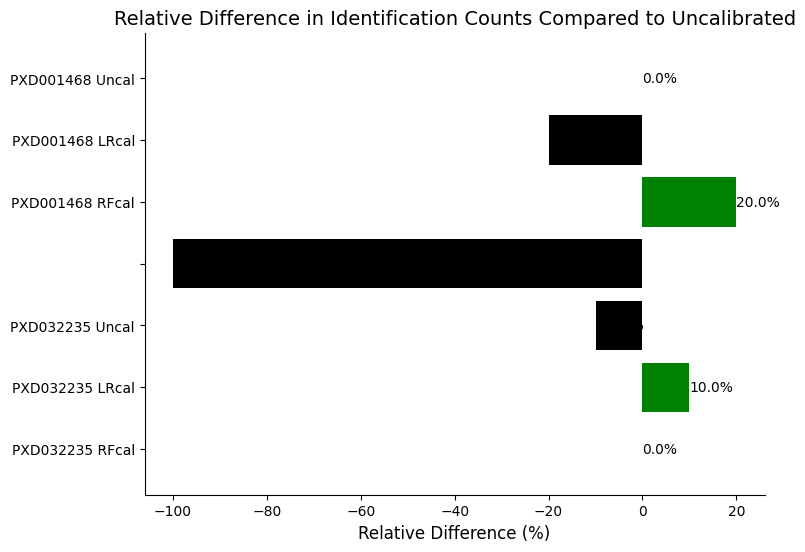

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Sample data
datasets = ['PXD001468 Uncal', 'PXD001468 LRcal', 'PXD001468 RFcal', '', 'PXD032235 Uncal', 'PXD032235 LRcal', 'PXD032235 RFcal']
q_lengths = [100, 80, 120, 0, 90, 110, 100]  # Sample percentages for demonstration

# Calculate percentage differences
uncalibrated_counts = q_lengths[0]
percentage_diffs = [(count - uncalibrated_counts) / uncalibrated_counts * 100 for count in q_lengths]

# Reverse the order of datasets and their percentage differences
datasets.reverse()
percentage_diffs.reverse()

# Plot
plt.figure(figsize=(8, 6))

# Plot bars
bars = plt.barh(datasets, percentage_diffs, color=['black' if diff < 0 else 'green' for diff in percentage_diffs])

# Add text annotations
for bar, diff in zip(bars, percentage_diffs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{diff:.1f}%', va='center', ha='left', fontsize=10)

# Add xlabel and title
plt.xlabel('Relative Difference (%)', fontsize=12)
plt.title('Relative Difference in Identification Counts Compared to Uncalibrated', fontsize=14)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

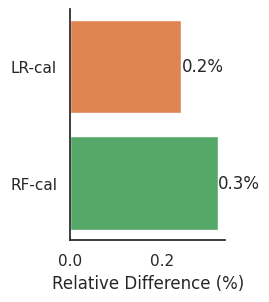

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Sample data
datasets = ['LR-cal', 'RF-cal']
q_lengths = [len(df_LRcal_results_q), len(df_RFcal_results_q)]  # Sample percentages for demonstration

# Calculate percentage differences
uncalibrated_counts = len(df_uncal_results_q)
percentage_diffs = [(count - uncalibrated_counts) / uncalibrated_counts * 100 for count in q_lengths]

# Reverse the order of datasets and their percentage differences
datasets.reverse()
percentage_diffs.reverse()

# Plot
plt.figure(figsize=(2, 3))

# Plot bars
bars = plt.barh(datasets, percentage_diffs, color=[sns.color_palette()[2], sns.color_palette()[1]])

# Add text annotations
for bar, diff in zip(bars, percentage_diffs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{diff:.1f}%', va='center', ha='left', fontsize=12)

# Add xlabel and title
plt.xlabel('Relative Difference (%)', fontsize=12)
#plt.title('Relative Difference in PSM Counts\nCompared to Uncalibrated (PXD001468)', fontsize=12)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

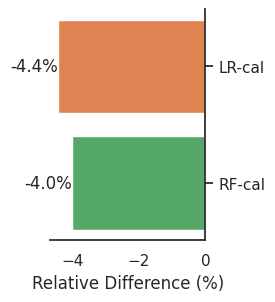

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
datasets = ['LR-cal', 'RF-cal']
q_lengths = [len(df_LRcal_results_nonlin_q), len(df_RFcal_results_nonlin_q)]  # Sample percentages for demonstration

# Calculate percentage differences
uncalibrated_counts = len(df_uncal_results_nonlin_q)
percentage_diffs = [(count - uncalibrated_counts) / uncalibrated_counts * 100 for count in q_lengths]

# Reverse the order of datasets and their percentage differences
datasets.reverse()
percentage_diffs.reverse()

# Plot
plt.figure(figsize=(2, 3))

# Plot bars
bars = plt.barh(datasets, percentage_diffs, color=[sns.color_palette()[2], sns.color_palette()[1]])

# Add text annotations
for bar, diff in zip(bars, percentage_diffs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{diff:.1f}%', va='center', ha='right', fontsize=12)

# Add xlabel and title
plt.xlabel('Relative Difference (%)', fontsize=12)
#plt.title('Relative Difference in PSM Counts Compared to Uncalibrated (PXD001468)', fontsize=12)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(False)

# Move y-axis to the right side
plt.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)

plt.show()

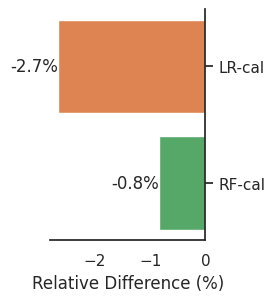

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
datasets = ['LR-cal', 'RF-cal']
q_lengths = [len(df_LRcal_peptides_q), len(df_RFcal_peptides_q)]  # Sample percentages for demonstration

# Calculate percentage differences
uncalibrated_counts = len(df_uncal_peptides_q)
percentage_diffs = [(count - uncalibrated_counts) / uncalibrated_counts * 100 for count in q_lengths]

# Reverse the order of datasets and their percentage differences
datasets.reverse()
percentage_diffs.reverse()

# Plot
plt.figure(figsize=(2, 3))

# Plot bars
bars = plt.barh(datasets, percentage_diffs, color=[sns.color_palette()[2], sns.color_palette()[1]])

# Add text annotations
for bar, diff in zip(bars, percentage_diffs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{diff:.1f}%', va='center', ha='right', fontsize=12)

# Add xlabel and title
plt.xlabel('Relative Difference (%)', fontsize=12)
#plt.title('Relative Difference in PSM Counts Compared to Uncalibrated (PXD001468)', fontsize=12)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(False)

# Move y-axis to the right side
plt.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)

plt.show()

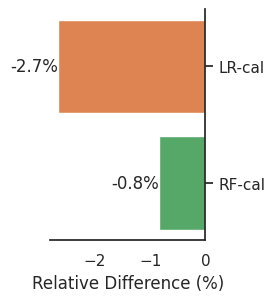

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
datasets = ['LR-cal', 'RF-cal']
q_lengths = [len(df_LRcal_peptides_nonlin_q), len(df_RFcal_peptides_nonlin_q)]  # Sample percentages for demonstration

# Calculate percentage differences
uncalibrated_counts = len(df_uncal_peptides_nonlin_q)
percentage_diffs = [(count - uncalibrated_counts) / uncalibrated_counts * 100 for count in q_lengths]

# Reverse the order of datasets and their percentage differences
datasets.reverse()
percentage_diffs.reverse()

# Plot
plt.figure(figsize=(2, 3))

# Plot bars
bars = plt.barh(datasets, percentage_diffs, color=[sns.color_palette()[2], sns.color_palette()[1]])

# Add text annotations
for bar, diff in zip(bars, percentage_diffs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{diff:.1f}%', va='center', ha='right', fontsize=12)

# Add xlabel and title
plt.xlabel('Relative Difference (%)', fontsize=12)
#plt.title('Relative Difference in PSM Counts Compared to Uncalibrated (PXD001468)', fontsize=12)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(False)

# Move y-axis to the right side
plt.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)

plt.show()